************************************************************************************************
# Problem statement

##### To develop a ML model capable of predicting a patient admitted to ICU is likely to encounter septic shock

************************************************************************************************

#### Septic shock, a life-threatening condition characterized by organ dysfunction due to a dysregulated host response to infection, requires prompt recognition and management.

##### Sepsis and septic shock are closely related conditions, with septic shock being a more severe and life-threatening manifestation of sepsis.

##### Sepsis can progress to septic shock if the body's response to the infection becomes dysregulated, leading to a cascade of events that impair cardiovascular function and tissue perfusion.

##### Septic shock is considered a more severe and critical stage of sepsis

##### Not all cases of sepsis progress to septic shock.

************************************************************************************************************

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)
pd.options.display.max_colwidth=150

# Importing the dataset

In [2]:
data=pd.read_csv('sepsis_status.csv') # this is our dataset
dictionary=pd.read_csv('Parameter _detail_Dictionary.csv') # this gives details regarding the dataset

In [3]:
icu_df=data.copy()
icu_df.head()

encounter_id  patient_id  hospital_id  septic_shock   age    bmi  \
0         66154       25312          118             0  68.0  22.73   
1        114252       59342           81             0  77.0  27.42   
2        119783       50777          118             0  25.0  31.95   
3         79267       46918          118             0  81.0  22.64   
4         92056       34377           33             0  19.0    NaN   

   elective_surgery  ethnicity gender  height hospital_admit_source  \
0                 0  Caucasian      M   180.3                 Floor   
1                 0  Caucasian      F   160.0                 Floor   
2                 0  Caucasian      F   172.7  Emergency Department   
3                 1  Caucasian      F   165.1        Operating Room   
4                 0  Caucasian      M   188.0                   NaN   

            icu_admit_source  icu_id icu_stay_type      icu_type  \
0                      Floor      92         admit         CTICU   
1                      Floor      90         admit  Med-Surg ICU   
2       Accident & Emergency      93         admit  Med-Surg ICU   
3  Operating Room / Recovery      92         admit         CTICU   
4       Accident & Emergency      91         admit  Med-Surg ICU   

   pre_icu_los_days  readmission_status  weight  albumin_apache  \
0          0.541667                   0    73.9             2.3   
1          0.927778                   0    70.2             NaN   
2          0.000694                   0    95.3             NaN   
3          0.000694                   0    61.7             NaN   
4          0.073611                   0     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  arf_apache  \
0               113.0               502.01                      0         0.0   
1               108.0               203.01                      0         0.0   
2               122.0               703.03                      0         0.0   
3               203.0              1206.03                      1         0.0   
4               119.0               601.01                      0         0.0   

   bilirubin_apache  bun_apache  creatinine_apache  fio2_apache  \
0               0.4        31.0               2.51          NaN   
1               NaN         9.0               0.56          1.0   
2               NaN         NaN                NaN          NaN   
3               NaN         NaN                NaN          0.6   
4               NaN         NaN                NaN          NaN   

   gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  gcs_verbal_apache  \
0              3.0               6.0                0.0                4.0   
1              1.0               3.0                0.0                1.0   
2              3.0               6.0                0.0                5.0   
3              4.0               6.0                0.0                5.0   
4              NaN               NaN                NaN                NaN   

   glucose_apache  heart_rate_apache  hematocrit_apache  intubated_apache  \
0           168.0              118.0               27.4               0.0   
1           145.0              120.0               36.9               0.0   
2             NaN              102.0                NaN               0.0   
3           185.0              114.0               25.9               1.0   
4             NaN               60.0                NaN               0.0   

   map_apache  paco2_apache  paco2_for_ph_apache  pao2_apache  ph_apache  \
0        40.0           NaN                  NaN          NaN        NaN   
1        46.0          37.0                 37.0         51.0       7.45   
2        68.0           NaN                  NaN          NaN        NaN   
3        60.0          30.0                 30.0        142.0       7.39   
4       103.0           NaN                  NaN          NaN        NaN   

   resprate_apache  sodium_apache  temp_apache  urineoutpu

In [4]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [5]:
dictionary

Category                   Variable Name  \
0                   identifier                    encounter_id   
1                   identifier                     hospital_id   
2                   identifier                      patient_id   
3                  demographic                   Sepsis_status   
4                  demographic                             age   
5                  demographic                             bmi   
6                  demographic                elective_surgery   
7                  demographic                       ethnicity   
8                  demographic                          gender   
9                  demographic                          height   
10                 demographic           hospital_admit_source   
11                 demographic                icu_admit_source   
12                 demographic                  icu_admit_type   
13                 demographic                          icu_id   
14                 demographic                   icu_stay_type   
15                 demographic                        icu_type   
16                 demographic                pre_icu_los_days   
17                 demographic              readmission_status   
18                 demographic                          weight   
19            APACHE covariate                  albumin_apache   
20            APACHE covariate              apache_2_diagnosis   
21            APACHE covariate             apache_3j_diagnosis   
22            APACHE covariate           apache_post_operative   
23            APACHE covariate                      arf_apache   
24            APACHE covariate                bilirubin_apache   
25            APACHE covariate                      bun_apache   
26            APACHE covariate               creatinine_apache   
27            APACHE covariate                     fio2_apache   
28            APACHE covariate                 gcs_eyes_apache   
29            APACHE covariate                gcs_motor_apache   
30            APACHE covariate               gcs_unable_apache   
31            APACHE covariate               gcs_verbal_apache   
32            APACHE covariate                  glucose_apache   
33            APACHE covariate               heart_rate_apache   
34            APACHE covariate               hematocrit_apache   
35            APACHE covariate                intubated_apache   
36            APACHE covariate                      map_apache   
37            APACHE covariate                    paco2_apache   
38            APACHE covariate             paco2_for_ph_apache   
39            APACHE covariate                     pao2_apache   
40            APACHE covariate                       ph_apache   
41            APACHE covariate                 resprate_apache   
42            APACHE covariate                   sodium_apache   
43            APACHE covariate                     temp_apache   
44            APACHE covariate              urineoutput_apache   
45            APACHE covariate               ventilated_apache   
46            APACHE covariate                      wbc_apache   
47                      vitals          d1_diasbp_invasive_max   
48                      vitals          d1_diasbp_invasive_min   
49                      vitals                   d1_diasbp_max   
50                      vitals                   d1_diasbp_min   
51                      vitals       d1_diasbp_noninvasive_max   
52                      vitals       d1_diasbp_noninvasive_min   
53                      vitals                d1_heartrate_max   
54                      vitals                d1_heartrate_min   
55                      vitals             d1_mbp_invasive_max   
56                      vitals             d1_mbp_invasive_min   
57                      vitals                      d1_mbp_max   
58                      vitals                      d1_mbp_min   
59                      vitals          d1_mbp_noninvasive_max

In [6]:
# Highly imbalance data
icu_df['septic_shock'].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: septic_shock, dtype: float64

In [7]:
null=icu_df.isnull().sum()/len(icu_df)*100
null

encounter_id                       0.000000
patient_id                         0.000000
hospital_id                        0.000000
septic_shock                       0.000000
age                                4.610033
bmi                                3.738837
elective_surgery                   0.000000
ethnicity                          1.521049
gender                             0.027259
height                             1.454538
hospital_admit_source             23.343474
icu_admit_source                   0.122120
icu_id                             0.000000
icu_stay_type                      0.000000
icu_type                           0.000000
pre_icu_los_days                   0.000000
readmission_status                 0.000000
weight                             2.965774
albumin_apache                    59.292576
apache_2_diagnosis                 1.812175
apache_3j_diagnosis                1.200484
apache_post_operative              0.000000
arf_apache                      

In [8]:
# We have mainly two categories of missing data- one having more than 50% missing other having less than 25% missing
null.sort_values(ascending=False)

h1_bilirubin_min                  92.265001
h1_bilirubin_max                  92.265001
h1_lactate_max                    91.992411
h1_lactate_min                    91.992411
h1_albumin_max                    91.398166
h1_albumin_min                    91.398166
h1_pao2fio2ratio_min              87.441257
h1_pao2fio2ratio_max              87.441257
h1_arterial_ph_max                83.329517
h1_arterial_ph_min                83.329517
h1_hco3_max                       82.969699
h1_hco3_min                       82.969699
h1_arterial_pco2_min              82.822501
h1_arterial_pco2_max              82.822501
h1_wbc_max                        82.815958
h1_wbc_min                        82.815958
h1_arterial_po2_max               82.807236
h1_arterial_po2_min               82.807236
h1_calcium_max                    82.717826
h1_calcium_min                    82.717826
h1_platelets_max                  82.510658
h1_platelets_min                  82.510658
h1_bun_max                      

In [9]:
#We will drop columns with more then 50% of missing values
high_null=null[null>=50]
high_null

albumin_apache            59.292576
bilirubin_apache          63.386870
fio2_apache               77.271488
paco2_apache              77.271488
paco2_for_ph_apache       77.271488
pao2_apache               77.271488
ph_apache                 77.271488
urineoutput_apache        53.425360
d1_diasbp_invasive_max    74.126896
d1_diasbp_invasive_min    74.126896
d1_mbp_invasive_max       73.901192
d1_mbp_invasive_min       73.901192
d1_sysbp_invasive_max     74.099637
d1_sysbp_invasive_min     74.099637
h1_diasbp_invasive_max    81.698342
h1_diasbp_invasive_min    81.698342
h1_mbp_invasive_max       81.606751
h1_mbp_invasive_min       81.606751
h1_sysbp_invasive_max     81.684167
h1_sysbp_invasive_min     81.684167
d1_albumin_max            53.532215
d1_albumin_min            53.532215
d1_bilirubin_max          58.522783
d1_bilirubin_min          58.522783
d1_inr_max                63.176431
d1_inr_min                63.176431
d1_lactate_max            74.576123
d1_lactate_min            74

In [10]:
high_null_col=high_null.index
high_null_col

Index(['albumin_apache', 'bilirubin_apache', 'fio2_apache', 'paco2_apache',
       'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'urineoutput_apache',
       'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min',
       'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_max',
       'd1_sysbp_invasive_min', 'h1_diasbp_invasive_max',
       'h1_diasbp_invasive_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min',
       'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'd1_albumin_max',
       'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_inr_max',
       'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'h1_albumin_max',
       'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max',
       'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max',
       'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max',
       'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min',
       'h1_hematocrit_max', 'h1_hematocri

In [11]:
len(high_null_col)

74

In [12]:
# 74 columns dropped
icu=icu_df.drop(high_null_col,axis=1)
icu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 112 entries, encounter_id to apache_2_bodysystem
dtypes: float64(96), int64(8), object(8)
memory usage: 78.4+ MB


In [13]:
icu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [14]:
# we will drop the rows having missing values. Imputation of missing values using mean,mode approach is avoided in medical critical data.

In [15]:
# 101 number of columns do not have missing values in it
icu.isnull().any().sum()

101

In [16]:
# rows having missing values
icu.isnull().any(axis=1).sum()

63918

In [17]:
df1=icu.dropna()

In [18]:
df1.isnull().sum().sum()

0

In [19]:
df1.shape

(27795, 112)

In [20]:
# Outlier treatment is not carried out as it is a critical medical data and we do not have the domain knowledge to differentiate between an outlier and a non-outlier

In [21]:
# lets drop some columns which is having no significance as per our basic understanding
cols_to_drop=["encounter_id","patient_id","hospital_admit_source","icu_admit_source","icu_id","icu_stay_type"]
df1=df1.drop(cols_to_drop,axis=1)
df1.shape

(27795, 106)

In [22]:
# Dropping columns with zero variance
one_unique=df1.apply(pd.Series.nunique) #Columns with number of unique values
one_unique

hospital_id                         119
septic_shock                          2
age                                  74
bmi                               16993
elective_surgery                      2
ethnicity                             6
gender                                2
height                              271
icu_type                              8
pre_icu_los_days                   4637
readmission_status                    1
weight                             2447
apache_2_diagnosis                   44
apache_3j_diagnosis                 363
apache_post_operative                 2
arf_apache                            2
bun_apache                          195
creatinine_apache                   938
gcs_eyes_apache                       4
gcs_motor_apache                      6
gcs_unable_apache                     1
gcs_verbal_apache                     5
glucose_apache                      534
heart_rate_apache                   143
hematocrit_apache                   353


In [23]:
#Columns with just one unique values
const_cols=one_unique[one_unique==1].index
const_cols

Index(['readmission_status', 'gcs_unable_apache'], dtype='object')

In [24]:
#Dropping the above columns
df1.drop(const_cols,axis=1,inplace=True)

In [25]:
df1.shape

(27795, 104)

 ### One-hot encoding

In [26]:
#Printing categorical columns
object_columns=df1.select_dtypes(include='object').columns
object_columns

Index(['ethnicity', 'gender', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object')

In [27]:
#Checking unique values in each categorical columns
for i in object_columns:
    print(f'No. of unique values in the column {i}:',df1[i].value_counts().count())
# Since unique values in the many of the columns are high, label encoding will lead to high values. 
# One-hot encoding is hence used

No. of unique values in the column ethnicity: 6
No. of unique values in the column gender: 2
No. of unique values in the column icu_type: 8
No. of unique values in the column apache_3j_bodysystem: 11
No. of unique values in the column apache_2_bodysystem: 10


In [28]:
df1=pd.get_dummies(df1,columns=object_columns,drop_first=True)

In [29]:
df1.head()

hospital_id  septic_shock   age        bmi  elective_surgery  height  \
0           118             0  68.0  22.730000                 0   180.3   
1            81             0  77.0  27.420000                 0   160.0   
5            83             0  67.0  27.560000                 0   190.5   
17          118             0  46.0  25.845717                 0   167.6   
23          118             0  87.0  21.963763                 0   180.3   

    pre_icu_los_days  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0           0.541667    73.9               113.0               502.01   
1           0.927778    70.2               108.0               203.01   
5           0.000694   100.0               301.0               403.01   
17          0.000000    72.6               108.0               203.01   
23          5.046528    71.4               113.0               501.05   

    apache_post_operative  arf_apache  bun_apache  creatinine_apache  \
0                       0         0.0        31.0               2.51   
1                       0         0.0         9.0               0.56   
5                       0         0.0        13.0               0.71   
17                      0         0.0        15.0               1.00   
23                      0         0.0        13.0               0.94   

    gcs_eyes_apache  gcs_motor_apache  gcs_verbal_apache  glucose_apache  \
0               3.0               6.0                4.0           168.0   
1               1.0               3.0                1.0           145.0   
5               4.0               6.0                5.0           156.0   
17              1.0               4.0                1.0           143.0   
23              3.0               6.0                1.0           105.0   

    heart_rate_apache  hematocrit_apache  intubated_apache  map_apache  \
0               118.0               27.4               0.0        40.0   
1               120.0               36.9               0.0        46.0   
5               113.0               44.2               0.0       130.0   
17              114.0               44.2               1.0       113.0   
23               99.0               28.9               0.0       133.0   

    resprate_apache  sodium_apache  temp_apache  ventilated_apache  \
0              36.0          134.0         39.3                0.0   
1              33.0          145.0         35.1                1.0   
5              35.0          137.0         36.6                0.0   
17             34.0          132.0         36.4                1.0   
23             33.0          146.0         36.3                1.0   

    wbc_apache  d1_diasbp_max  d1_diasbp_min  d1_diasbp_noninvasive_max  \
0         14.1           68.0           37.0                       68.0   
1         12.7           95.0           31.0                       95.0   
5         10.9          100.0           61.0                      100.0   
17         9.7           89.0           61.0                       89.0   
23         9.9           88.0           65.0                       88.0   

    d1_diasbp_noninvasive_min  d1_heartrate_max  d1_heartrate_min  d1_mbp_max  \
0                        37.0             119.0              72.0        89.0   
1                        31.0             118.0              72.0       120.0   
5                        61.0             113.0              83.0       127.0   
17                       61.0              98.0              64.0       113.0   
23                       65.0             116.0              74.0       123.0   

    d1_mbp_min  d1_mbp_noninvasive_max  d1_mbp_noninvasive_min  \
0         46.0                    89.0                    46.0   
1         38.0                   120.0                    38.0   
5         80.0                   127.0                    80.0   
17        76.0                   113.0                    76.0   
23        90.0                   123.0                    90.0   

    d1_resprate_m

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27795 entries, 0 to 91709
Columns: 131 entries, hospital_id to apache_2_bodysystem_Undefined diagnoses
dtypes: float64(95), int64(4), uint8(32)
memory usage: 22.1 MB


In [31]:
# split the dependent and independent variables
X=df1.drop('septic_shock',axis=1)
Y=df1['septic_shock']

In [32]:
# Multi-collinearity check
corr_mat=X.corr(method='spearman').abs()
corr_mat

hospital_id       age       bmi  \
hospital_id                                   1.000000  0.023046  0.014703   
age                                           0.023046  1.000000  0.102192   
bmi                                           0.014703  0.102192  1.000000   
elective_surgery                              0.049647  0.054517  0.028267   
height                                        0.033495  0.123064  0.012171   
pre_icu_los_days                              0.000866  0.090182  0.009129   
weight                                        0.027434  0.148448  0.880394   
apache_2_diagnosis                            0.005550  0.035333  0.008191   
apache_3j_diagnosis                           0.017585  0.088868  0.033975   
apache_post_operative                         0.047964  0.045835  0.030399   
arf_apache                                    0.000385  0.019419  0.004010   
bun_apache                                    0.008449  0.341147  0.081152   
creatinine_apache                             0.013198  0.206540  0.155061   
gcs_eyes_apache                               0.026168  0.042142  0.020329   
gcs_motor_apache                              0.013921  0.035899  0.039773   
gcs_verbal_apache                             0.009046  0.021180  0.053836   
glucose_apache                                0.007863  0.045058  0.150083   
heart_rate_apache                             0.001770  0.161223  0.042985   
hematocrit_apache                             0.000898  0.121132  0.117249   
intubated_apache                              0.016270  0.008750  0.036228   
map_apache                                    0.012759  0.076555  0.053504   
resprate_apache                               0.054585  0.031430  0.002553   
sodium_apache                                 0.003439  0.042749  0.021054   
temp_apache                                   0.059842  0.113531  0.037492   
ventilated_apache                             0.034473  0.006724  0.069622   
wbc_apache                                    0.019394  0.011917  0.054315   
d1_diasbp_max                                 0.012832  0.073898  0.054502   
d1_diasbp_min                                 0.015559  0.251466  0.008948   
d1_diasbp_noninvasive_max                     0.012855  0.073416  0.054250   
d1_diasbp_noninvasive_min                     0.015755  0.251180  0.009203   
d1_heartrate_max                              0.019620  0.154576  0.043471   
d1_heartrate_min                              0.014032  0.151041  0.011664   
d1_mbp_max                                    0.005818  0.014250  0.072978   
d1_mbp_min                                    0.030437  0.172263  0.020790   
d1_mbp_noninvasive_max                        0.006060  0.014217  0.072847   
d1_mbp_noninvasive_min                        0.030315  0.172481  0.020615   
d1_resprate_max                               0.014507  0.031633  0.022875   
d1_resprate_min                               0.083630  0.051329  0.000331   
d1_spo2_max                                   0.025829  0.029938  0.124595   
d1_spo2_min                                   0.033792  0.113899  0.088231   
d1_sysbp_max                                  0.009972  0.104631  0.095507   
d1_sysbp_min                                  0.029607  0.075637  0.059089   
d1_sysbp_noninvasive_max                      0.009554  0.104315  0.095253   
d1_sysbp_noninvasive_min                      0.029469  0.075678  0.058879   
d1_temp_max                                   0.034897  0.097403  0.019230   
d1_temp_min                                   0.080696  0.116708  0.036794   
h1_diasbp_max                                 0.019332  0.168123  0.032363   
h1_diasbp_min                                 0.025912  0.216529  0.001410   
h1_diasbp_noninvasive_max                     0.019883  0.166813  0.030786   
h1_diasbp_noninvasive_min                     0.022735  0.216744  0.000757   
h1_heartrate_max                              0.004763  0.178289 

<AxesSubplot:>

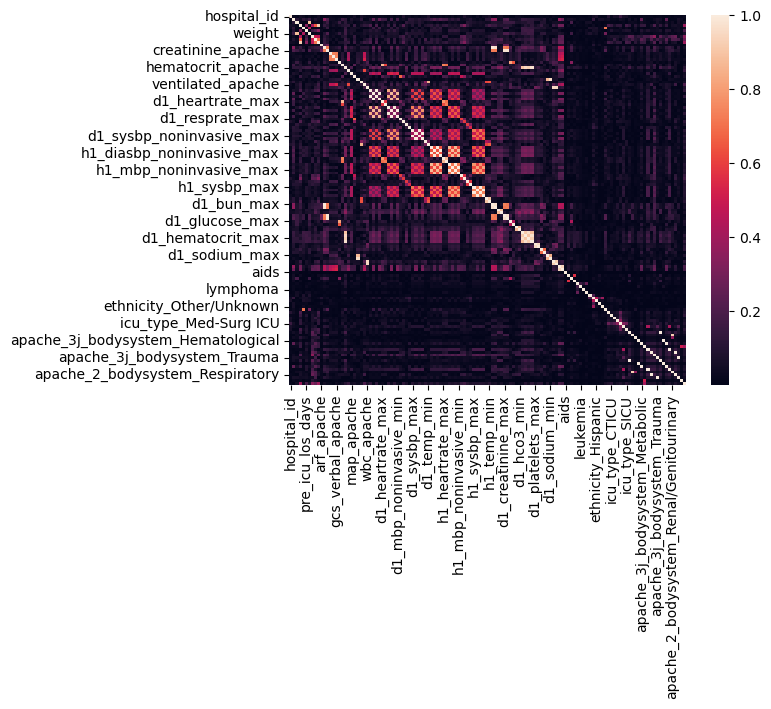

In [33]:
# Visually not able to identify columns with high multi-collinearity
sns.heatmap(corr_mat)

In [34]:
#extracting upper triangle of correlation matrix
upper=corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))
upper

hospital_id       age       bmi  \
hospital_id                                        NaN  0.023046  0.014703   
age                                                NaN       NaN  0.102192   
bmi                                                NaN       NaN       NaN   
elective_surgery                                   NaN       NaN       NaN   
height                                             NaN       NaN       NaN   
pre_icu_los_days                                   NaN       NaN       NaN   
weight                                             NaN       NaN       NaN   
apache_2_diagnosis                                 NaN       NaN       NaN   
apache_3j_diagnosis                                NaN       NaN       NaN   
apache_post_operative                              NaN       NaN       NaN   
arf_apache                                         NaN       NaN       NaN   
bun_apache                                         NaN       NaN       NaN   
creatinine_apache                                  NaN       NaN       NaN   
gcs_eyes_apache                                    NaN       NaN       NaN   
gcs_motor_apache                                   NaN       NaN       NaN   
gcs_verbal_apache                                  NaN       NaN       NaN   
glucose_apache                                     NaN       NaN       NaN   
heart_rate_apache                                  NaN       NaN       NaN   
hematocrit_apache                                  NaN       NaN       NaN   
intubated_apache                                   NaN       NaN       NaN   
map_apache                                         NaN       NaN       NaN   
resprate_apache                                    NaN       NaN       NaN   
sodium_apache                                      NaN       NaN       NaN   
temp_apache                                        NaN       NaN       NaN   
ventilated_apache                                  NaN       NaN       NaN   
wbc_apache                                         NaN       NaN       NaN   
d1_diasbp_max                                      NaN       NaN       NaN   
d1_diasbp_min                                      NaN       NaN       NaN   
d1_diasbp_noninvasive_max                          NaN       NaN       NaN   
d1_diasbp_noninvasive_min                          NaN       NaN       NaN   
d1_heartrate_max                                   NaN       NaN       NaN   
d1_heartrate_min                                   NaN       NaN       NaN   
d1_mbp_max                                         NaN       NaN       NaN   
d1_mbp_min                                         NaN       NaN       NaN   
d1_mbp_noninvasive_max                             NaN       NaN       NaN   
d1_mbp_noninvasive_min                             NaN       NaN       NaN   
d1_resprate_max                                    NaN       NaN       NaN   
d1_resprate_min                                    NaN       NaN       NaN   
d1_spo2_max                                        NaN       NaN       NaN   
d1_spo2_min                                        NaN       NaN       NaN   
d1_sysbp_max                                       NaN       NaN       NaN   
d1_sysbp_min                                       NaN       NaN       NaN   
d1_sysbp_noninvasive_max                           NaN       NaN       NaN   
d1_sysbp_noninvasive_min                           NaN       NaN       NaN   
d1_temp_max                                        NaN       NaN       NaN   
d1_temp_min                                        NaN       NaN       NaN   
h1_diasbp_max                                      NaN       NaN       NaN   
h1_diasbp_min                                      NaN       NaN       NaN   
h1_diasbp_noninvasive_max                          NaN       NaN       NaN   
h1_diasbp_noninvasive_min                          NaN       NaN       NaN   
h1_heartrate_max                                   NaN       NaN 

In [35]:
# extracting columns with multi-collinearity greater than or equal to 0.9
high_cor_features=[i for i in upper.columns if any(upper[i]>=0.9)]
high_cor_features

['apache_post_operative',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'apache_4a_icu_sepsis_prob',
 'apache_2_bodysystem_Gastrointestinal',
 'apache_2_bodysystem_Haematologic',
 'apache_2_bodysystem_Metabolic',
 'apache_2_bodysystem_Neurologic',
 'apache_2_bodysystem_Renal/Genitourinary',
 'apache_2_bodysystem_Respiratory',
 'apache_2_bodysystem_Trauma']

In [36]:
len(high_cor_features)

32

In [37]:
# dropping columns with multi-collinearity greater than or equal to 0.9
X1=X.drop(high_cor_features,axis=1)

In [38]:
X1.shape

(27795, 98)

In [39]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

In [40]:
scale=MinMaxScaler()
X_final=scale.fit_transform(X1)

In [41]:
X_final=pd.DataFrame(X_final,columns=X1.columns)
X_final

hospital_id       age       bmi  elective_surgery    height  \
0         0.574257  0.712329  0.148859               0.0  0.738140   
1         0.391089  0.835616  0.237400               0.0  0.390478   
2         0.400990  0.698630  0.240043               0.0  0.912828   
3         0.574257  0.410959  0.207679               0.0  0.520637   
4         0.574257  0.972603  0.134394               0.0  0.738140   
...            ...       ...       ...               ...       ...   
27790     0.955446  0.164384  1.000000               0.0  0.000000   
27791     0.955446  0.219178  0.329616               1.0  0.390478   
27792     0.955446  0.424658  0.690860               1.0  0.989896   
27793     0.589109  0.520548  0.092987               0.0  0.695325   
27794     0.589109  0.547945  0.610434               0.0  0.784381   

       pre_icu_los_days    weight  apache_2_diagnosis  apache_3j_diagnosis  \
0              0.011390  0.239484            0.057971             0.190949   
1              0.017132  0.214383            0.033816             0.048571   
2              0.003346  0.416554            0.966184             0.143807   
3              0.003336  0.230665            0.033816             0.048571   
4              0.078379  0.222524            0.057971             0.190492   
...                 ...       ...                 ...                  ...   
27790          0.004988  0.506784            0.024155             0.052856   
27791          0.003470  0.299186            0.570048             0.668092   
27792          0.003831  1.000000            0.980676             0.621417   
27793          0.003718  0.162144            0.038647             0.003333   
27794          0.005122  0.810041            0.057971             0.190492   

       arf_apache  bun_apache  creatinine_apache  gcs_eyes_apache  \
0             0.0    0.219512           0.203125         0.666667   
1             0.0    0.040650           0.023897         0.000000   
2             0.0    0.073171           0.037684         1.000000   
3             0.0    0.089431           0.064338         0.000000   
4             0.0    0.073171           0.058824         0.666667   
...           ...         ...                ...              ...   
27790         0.0    0.016260           0.027574         1.000000   
27791         0.0    0.000000           0.027574         0.666667   
27792         0.0    0.040650           0.018382         1.000000   
27793         0.0    0.089431           0.036765         1.000000   
27794         0.0    0.243902           0.183824         1.000000   

       gcs_motor_apache  gcs_verbal_apache  glucose_apache  heart_rate_apache  \
0                   1.0               0.75        0.230481           0.594595   
1                   0.4               0.00        0.189387           0.608108   
2                   1.0               1.00        0.209041           0.560811   
3                   0.6               0.00        0.185814           0.567568   
4                   1.0               0.00        0.117920           0.466216   
...                 ...                ...             ...                ...   
27790               1.0               1.00        0.080400           0.756757   
27791               1.0               1.00        0.128640           0.445946   
27792               1.0               0.25        0.159014           0.722973   
27793               1.0               1.00        0.092907           0.168919   
27794               1.0               1.00        0.246561           0.472973   

       hematocrit_apache  intubated_apache  map_apache  resprate_apache  \
0               0.318182               0.0     0.00000         0.571429   
1               0.588068               0.0     0.03750         0.517857   
2               0.795455               0.0     0.56250         0.553571   
3               0.795455               1.0     0.45625         0.535714   
4               0.360795               0.0     0.581

In [42]:
# Checking independant variables having high multi collinearity with target variable (Significant column)
X_final.corrwith(Y).abs().sort_values(ascending=False)

apache_3j_bodysystem_Trauma                  0.019267
apache_3j_bodysystem_Musculoskeletal/Skin    0.019069
apache_2_bodysystem_Undefined Diagnoses      0.018963
d1_temp_max                                  0.018778
d1_mbp_min                                   0.018743
hospital_id                                  0.018689
apache_3j_bodysystem_Gynecological           0.016759
apache_3j_bodysystem_Respiratory             0.016263
icu_type_Cardiac ICU                         0.015991
cirrhosis                                    0.015982
gender_M                                     0.014088
ethnicity_Caucasian                          0.013172
d1_diasbp_min                                0.013086
apache_3j_bodysystem_Hematological           0.013084
gcs_verbal_apache                            0.012828
ethnicity_Hispanic                           0.012726
d1_glucose_min                               0.012174
aids                                         0.011947
creatinine_apache           

# Model Building

### i) Using hold out train-test split method :-

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y,test_size=0.2,stratify=Y,random_state=100)

In [44]:
#import algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [45]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [49]:
rf=RandomForestClassifier()
bg=BaggingClassifier()
svc=SVC()
dt=DecisionTreeClassifier()
lr=LogisticRegression()
knn=KNeighborsClassifier()
gnb=GaussianNB()
gb=GradientBoostingClassifier()
ab=AdaBoostClassifier()
xgb=XGBClassifier()
catb=CatBoostClassifier()
lgb=LGBMClassifier()

In [50]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, precision_recall_curve

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for model in[rf,bg,dt,svc,lr,knn,gnb,gb,ab,xgb,catb,lgb]:
    print("======="*6)
    print("Performance of",model)
    print("======="*6)
    abc=model.fit(X_train,Y_train)
    y_pred=abc.predict(X_test)
    cm=confusion_matrix(Y_test,y_pred)
    AS=accuracy_score(Y_test,y_pred)
    CR=classification_report(Y_test,y_pred)
    ROC=roc_auc_score(Y_test,y_pred)
    PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
    # print of metrics
    print("confusion matrix \n",cm) 
    print("======="*3)
    print("Accuracy \n",AS) 
    print("======="*3)
    print("Classification Report \n",CR) 
    print("======="*3)
    print("ROC_AUC \n",ROC) 
    print("======="*3)
    print("MACRO Precision_recall_F1 \n",PRFS) 
    #print("PRECISION MACRO",precisio_test_cv) 
    #print("RECALL MACRO",Recall_test_cv) 

Performance of RandomForestClassifier()
confusion matrix 
 [[4990   62]
 [ 378  129]]
Accuracy 
 0.9208490735743838
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5052
           1       0.68      0.25      0.37       507

    accuracy                           0.92      5559
   macro avg       0.80      0.62      0.66      5559
weighted avg       0.91      0.92      0.90      5559

ROC_AUC 
 0.6210827512216147
MACRO Precision_recall_F1 
 (0.8024876912633329, 0.6210827512216147, 0.6637005098196658, None)
Performance of BaggingClassifier()
confusion matrix 
 [[4950  102]
 [ 363  144]]
Accuracy 
 0.9163518618456556
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      5052
           1       0.59      0.28      0.38       507

    accuracy                           0.92      5559
   macro avg       0.76      0.63      0.67      5559
we

0:	learn: 0.6478186	total: 216ms	remaining: 3m 35s
1:	learn: 0.6071611	total: 244ms	remaining: 2m 1s
2:	learn: 0.5676184	total: 264ms	remaining: 1m 27s
3:	learn: 0.5332537	total: 281ms	remaining: 1m 10s
4:	learn: 0.5050235	total: 297ms	remaining: 59.1s
5:	learn: 0.4770431	total: 312ms	remaining: 51.8s
6:	learn: 0.4515091	total: 329ms	remaining: 46.6s
7:	learn: 0.4289299	total: 344ms	remaining: 42.6s
8:	learn: 0.4093043	total: 359ms	remaining: 39.6s
9:	learn: 0.3899099	total: 375ms	remaining: 37.1s
10:	learn: 0.3734348	total: 390ms	remaining: 35.1s
11:	learn: 0.3562113	total: 406ms	remaining: 33.5s
12:	learn: 0.3435874	total: 423ms	remaining: 32.1s
13:	learn: 0.3330632	total: 446ms	remaining: 31.4s
14:	learn: 0.3216823	total: 464ms	remaining: 30.5s
15:	learn: 0.3100061	total: 481ms	remaining: 29.6s
16:	learn: 0.3031505	total: 496ms	remaining: 28.7s
17:	learn: 0.2943630	total: 513ms	remaining: 28s
18:	learn: 0.2887447	total: 529ms	remaining: 27.3s
19:	learn: 0.2832242	total: 544ms	remain

161:	learn: 0.1854930	total: 3.75s	remaining: 19.4s
162:	learn: 0.1852993	total: 3.79s	remaining: 19.4s
163:	learn: 0.1851500	total: 3.83s	remaining: 19.6s
164:	learn: 0.1849956	total: 3.88s	remaining: 19.6s
165:	learn: 0.1848494	total: 4.03s	remaining: 20.2s
166:	learn: 0.1847084	total: 4.16s	remaining: 20.8s
167:	learn: 0.1845808	total: 4.29s	remaining: 21.2s
168:	learn: 0.1844611	total: 4.33s	remaining: 21.3s
169:	learn: 0.1842874	total: 4.38s	remaining: 21.4s
170:	learn: 0.1841990	total: 4.41s	remaining: 21.4s
171:	learn: 0.1840952	total: 4.44s	remaining: 21.4s
172:	learn: 0.1839474	total: 4.47s	remaining: 21.4s
173:	learn: 0.1838167	total: 4.5s	remaining: 21.4s
174:	learn: 0.1836603	total: 4.53s	remaining: 21.4s
175:	learn: 0.1835147	total: 4.58s	remaining: 21.4s
176:	learn: 0.1834064	total: 4.62s	remaining: 21.5s
177:	learn: 0.1832588	total: 4.66s	remaining: 21.5s
178:	learn: 0.1831032	total: 4.72s	remaining: 21.6s
179:	learn: 0.1829520	total: 4.76s	remaining: 21.7s
180:	learn: 0

327:	learn: 0.1634162	total: 8.75s	remaining: 17.9s
328:	learn: 0.1632828	total: 8.77s	remaining: 17.9s
329:	learn: 0.1631500	total: 8.79s	remaining: 17.9s
330:	learn: 0.1630379	total: 8.81s	remaining: 17.8s
331:	learn: 0.1628630	total: 8.83s	remaining: 17.8s
332:	learn: 0.1627424	total: 8.85s	remaining: 17.7s
333:	learn: 0.1626472	total: 8.87s	remaining: 17.7s
334:	learn: 0.1624999	total: 8.9s	remaining: 17.7s
335:	learn: 0.1623278	total: 8.93s	remaining: 17.6s
336:	learn: 0.1622573	total: 8.95s	remaining: 17.6s
337:	learn: 0.1620925	total: 8.97s	remaining: 17.6s
338:	learn: 0.1619274	total: 8.99s	remaining: 17.5s
339:	learn: 0.1617472	total: 9.02s	remaining: 17.5s
340:	learn: 0.1616323	total: 9.04s	remaining: 17.5s
341:	learn: 0.1614539	total: 9.06s	remaining: 17.4s
342:	learn: 0.1613353	total: 9.08s	remaining: 17.4s
343:	learn: 0.1612135	total: 9.1s	remaining: 17.4s
344:	learn: 0.1610987	total: 9.12s	remaining: 17.3s
345:	learn: 0.1609338	total: 9.14s	remaining: 17.3s
346:	learn: 0.

494:	learn: 0.1441195	total: 12.2s	remaining: 12.4s
495:	learn: 0.1440437	total: 12.2s	remaining: 12.4s
496:	learn: 0.1438987	total: 12.2s	remaining: 12.4s
497:	learn: 0.1437524	total: 12.2s	remaining: 12.3s
498:	learn: 0.1436374	total: 12.3s	remaining: 12.3s
499:	learn: 0.1434991	total: 12.3s	remaining: 12.3s
500:	learn: 0.1434029	total: 12.3s	remaining: 12.3s
501:	learn: 0.1432467	total: 12.3s	remaining: 12.2s
502:	learn: 0.1431355	total: 12.3s	remaining: 12.2s
503:	learn: 0.1430777	total: 12.4s	remaining: 12.2s
504:	learn: 0.1429574	total: 12.4s	remaining: 12.1s
505:	learn: 0.1428644	total: 12.4s	remaining: 12.1s
506:	learn: 0.1427753	total: 12.4s	remaining: 12.1s
507:	learn: 0.1426657	total: 12.4s	remaining: 12s
508:	learn: 0.1425581	total: 12.5s	remaining: 12s
509:	learn: 0.1424338	total: 12.5s	remaining: 12s
510:	learn: 0.1423537	total: 12.5s	remaining: 12s
511:	learn: 0.1422136	total: 12.5s	remaining: 11.9s
512:	learn: 0.1421072	total: 12.5s	remaining: 11.9s
513:	learn: 0.142017

661:	learn: 0.1285765	total: 15.4s	remaining: 7.86s
662:	learn: 0.1284960	total: 15.4s	remaining: 7.84s
663:	learn: 0.1283776	total: 15.4s	remaining: 7.81s
664:	learn: 0.1282975	total: 15.5s	remaining: 7.79s
665:	learn: 0.1281782	total: 15.5s	remaining: 7.76s
666:	learn: 0.1281170	total: 15.5s	remaining: 7.73s
667:	learn: 0.1280493	total: 15.5s	remaining: 7.71s
668:	learn: 0.1279757	total: 15.5s	remaining: 7.69s
669:	learn: 0.1279253	total: 15.6s	remaining: 7.67s
670:	learn: 0.1278794	total: 15.6s	remaining: 7.64s
671:	learn: 0.1278320	total: 15.6s	remaining: 7.62s
672:	learn: 0.1277576	total: 15.6s	remaining: 7.59s
673:	learn: 0.1276567	total: 15.6s	remaining: 7.57s
674:	learn: 0.1275529	total: 15.7s	remaining: 7.54s
675:	learn: 0.1274563	total: 15.7s	remaining: 7.51s
676:	learn: 0.1273776	total: 15.7s	remaining: 7.49s
677:	learn: 0.1273288	total: 15.7s	remaining: 7.46s
678:	learn: 0.1272430	total: 15.7s	remaining: 7.44s
679:	learn: 0.1271457	total: 15.8s	remaining: 7.41s
680:	learn: 

822:	learn: 0.1156921	total: 18.4s	remaining: 3.96s
823:	learn: 0.1155947	total: 18.4s	remaining: 3.93s
824:	learn: 0.1155143	total: 18.4s	remaining: 3.91s
825:	learn: 0.1154794	total: 18.5s	remaining: 3.89s
826:	learn: 0.1153857	total: 18.5s	remaining: 3.86s
827:	learn: 0.1153405	total: 18.5s	remaining: 3.84s
828:	learn: 0.1152778	total: 18.5s	remaining: 3.82s
829:	learn: 0.1152394	total: 18.5s	remaining: 3.79s
830:	learn: 0.1151372	total: 18.5s	remaining: 3.77s
831:	learn: 0.1150544	total: 18.6s	remaining: 3.75s
832:	learn: 0.1149864	total: 18.6s	remaining: 3.73s
833:	learn: 0.1148988	total: 18.6s	remaining: 3.7s
834:	learn: 0.1148365	total: 18.6s	remaining: 3.68s
835:	learn: 0.1147826	total: 18.6s	remaining: 3.65s
836:	learn: 0.1147190	total: 18.7s	remaining: 3.63s
837:	learn: 0.1146415	total: 18.7s	remaining: 3.61s
838:	learn: 0.1145740	total: 18.7s	remaining: 3.59s
839:	learn: 0.1144884	total: 18.7s	remaining: 3.56s
840:	learn: 0.1143751	total: 18.7s	remaining: 3.54s
841:	learn: 0

982:	learn: 0.1044659	total: 21.4s	remaining: 370ms
983:	learn: 0.1044097	total: 21.4s	remaining: 348ms
984:	learn: 0.1043686	total: 21.4s	remaining: 326ms
985:	learn: 0.1042962	total: 21.5s	remaining: 305ms
986:	learn: 0.1042115	total: 21.5s	remaining: 283ms
987:	learn: 0.1041634	total: 21.5s	remaining: 261ms
988:	learn: 0.1041012	total: 21.5s	remaining: 239ms
989:	learn: 0.1040486	total: 21.5s	remaining: 217ms
990:	learn: 0.1039907	total: 21.5s	remaining: 196ms
991:	learn: 0.1039230	total: 21.6s	remaining: 174ms
992:	learn: 0.1038833	total: 21.6s	remaining: 152ms
993:	learn: 0.1038151	total: 21.6s	remaining: 130ms
994:	learn: 0.1037378	total: 21.6s	remaining: 109ms
995:	learn: 0.1037203	total: 21.6s	remaining: 86.9ms
996:	learn: 0.1036764	total: 21.6s	remaining: 65.1ms
997:	learn: 0.1036320	total: 21.7s	remaining: 43.4ms
998:	learn: 0.1035835	total: 21.7s	remaining: 21.7ms
999:	learn: 0.1035338	total: 21.7s	remaining: 0us
confusion matrix 
 [[4964   88]
 [ 345  162]]
Accuracy 
 0.922

### ii) Using Stratified Shuffle Split train-test split method :-

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_val_predict

In [59]:
from sklearn.model_selection import cross_validate

In [60]:
for model in[rf,bg,dt,svc,lr,knn,gnb,gb,ab,xgb,catb,lgb]:
    print("======="*5)
    print("Performance of",model)
    print("======="*5) 
    cv=StratifiedShuffleSplit(n_splits=10,test_size=0.25,random_state=50)
    scoring=["roc_auc","f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,X_final,Y,scoring=scoring,cv=cv)
    roc_auc_test_cv=round(cross_val_scores["test_roc_auc"].mean(),4)
    f1_test_cv=round(cross_val_scores["test_f1_macro"].mean(),4)
    precisio_test_cv=round(cross_val_scores["test_precision_macro"].mean(),4)
    Recall_test_cv=round(cross_val_scores["test_recall_macro"].mean(),4)
    
    # print of metrics
    print("ROC AUC",roc_auc_test_cv) 
    print("F1 MACRO",f1_test_cv) 
    print("PRECISION MACRO",precisio_test_cv) 
    print("RECALL MACRO",Recall_test_cv) 
    

Performance of RandomForestClassifier()
ROC AUC 0.8748
F1 MACRO 0.6568
PRECISION MACRO 0.8337
RECALL MACRO 0.6126
Performance of BaggingClassifier()
ROC AUC 0.8182
F1 MACRO 0.664
PRECISION MACRO 0.7721
RECALL MACRO 0.625
Performance of DecisionTreeClassifier()
ROC AUC 0.6469
F1 MACRO 0.642
PRECISION MACRO 0.6378
RECALL MACRO 0.6469
Performance of SVC()
ROC AUC 0.8242
F1 MACRO 0.6154
PRECISION MACRO 0.8429
RECALL MACRO 0.5808
Performance of LogisticRegression()
ROC AUC 0.8711
F1 MACRO 0.6726
PRECISION MACRO 0.7908
RECALL MACRO 0.6308
Performance of KNeighborsClassifier()
ROC AUC 0.708
F1 MACRO 0.5927
PRECISION MACRO 0.7608
RECALL MACRO 0.5669
Performance of GaussianNB()
ROC AUC 0.83
F1 MACRO 0.6108
PRECISION MACRO 0.6071
RECALL MACRO 0.749
Performance of GradientBoostingClassifier()
ROC AUC 0.8835
F1 MACRO 0.6997
PRECISION MACRO 0.8114
RECALL MACRO 0.6544
Performance of AdaBoostClassifier()
ROC AUC 0.8758
F1 MACRO 0.6942
PRECISION MACRO 0.7837
RECALL MACRO 0.654
Performance of XGBClassi

111:	learn: 0.1948906	total: 3.92s	remaining: 31.1s
112:	learn: 0.1946253	total: 3.94s	remaining: 30.9s
113:	learn: 0.1944463	total: 3.96s	remaining: 30.8s
114:	learn: 0.1943202	total: 3.98s	remaining: 30.7s
115:	learn: 0.1940992	total: 4s	remaining: 30.5s
116:	learn: 0.1939220	total: 4.03s	remaining: 30.4s
117:	learn: 0.1937691	total: 4.04s	remaining: 30.2s
118:	learn: 0.1936091	total: 4.07s	remaining: 30.1s
119:	learn: 0.1934278	total: 4.09s	remaining: 30s
120:	learn: 0.1932446	total: 4.11s	remaining: 29.8s
121:	learn: 0.1930162	total: 4.13s	remaining: 29.7s
122:	learn: 0.1928773	total: 4.15s	remaining: 29.6s
123:	learn: 0.1927360	total: 4.17s	remaining: 29.5s
124:	learn: 0.1925314	total: 4.2s	remaining: 29.4s
125:	learn: 0.1924045	total: 4.22s	remaining: 29.3s
126:	learn: 0.1922513	total: 4.24s	remaining: 29.1s
127:	learn: 0.1920490	total: 4.26s	remaining: 29s
128:	learn: 0.1918483	total: 4.28s	remaining: 28.9s
129:	learn: 0.1916701	total: 4.3s	remaining: 28.8s
130:	learn: 0.1914842

274:	learn: 0.1721189	total: 7.61s	remaining: 20s
275:	learn: 0.1719688	total: 7.63s	remaining: 20s
276:	learn: 0.1718876	total: 7.65s	remaining: 20s
277:	learn: 0.1717749	total: 7.67s	remaining: 19.9s
278:	learn: 0.1716971	total: 7.7s	remaining: 19.9s
279:	learn: 0.1715865	total: 7.73s	remaining: 19.9s
280:	learn: 0.1714478	total: 7.76s	remaining: 19.8s
281:	learn: 0.1713345	total: 7.78s	remaining: 19.8s
282:	learn: 0.1712477	total: 7.8s	remaining: 19.8s
283:	learn: 0.1711290	total: 7.82s	remaining: 19.7s
284:	learn: 0.1710087	total: 7.84s	remaining: 19.7s
285:	learn: 0.1708675	total: 7.87s	remaining: 19.6s
286:	learn: 0.1707354	total: 7.88s	remaining: 19.6s
287:	learn: 0.1705775	total: 7.9s	remaining: 19.5s
288:	learn: 0.1704983	total: 7.92s	remaining: 19.5s
289:	learn: 0.1703547	total: 7.95s	remaining: 19.5s
290:	learn: 0.1702043	total: 7.97s	remaining: 19.4s
291:	learn: 0.1700786	total: 7.99s	remaining: 19.4s
292:	learn: 0.1699815	total: 8.01s	remaining: 19.3s
293:	learn: 0.1698694

436:	learn: 0.1524282	total: 12.6s	remaining: 16.2s
437:	learn: 0.1523185	total: 12.6s	remaining: 16.2s
438:	learn: 0.1522460	total: 12.6s	remaining: 16.2s
439:	learn: 0.1520665	total: 12.7s	remaining: 16.1s
440:	learn: 0.1519150	total: 12.7s	remaining: 16.1s
441:	learn: 0.1518218	total: 12.7s	remaining: 16s
442:	learn: 0.1517274	total: 12.7s	remaining: 16s
443:	learn: 0.1516321	total: 12.8s	remaining: 16s
444:	learn: 0.1515181	total: 12.8s	remaining: 15.9s
445:	learn: 0.1513966	total: 12.8s	remaining: 15.9s
446:	learn: 0.1512329	total: 12.8s	remaining: 15.9s
447:	learn: 0.1510841	total: 12.8s	remaining: 15.8s
448:	learn: 0.1509612	total: 12.9s	remaining: 15.8s
449:	learn: 0.1508468	total: 12.9s	remaining: 15.7s
450:	learn: 0.1507847	total: 12.9s	remaining: 15.7s
451:	learn: 0.1506883	total: 12.9s	remaining: 15.7s
452:	learn: 0.1505613	total: 12.9s	remaining: 15.6s
453:	learn: 0.1504840	total: 13s	remaining: 15.6s
454:	learn: 0.1503736	total: 13s	remaining: 15.5s
455:	learn: 0.1503034	

604:	learn: 0.1352878	total: 16.8s	remaining: 11s
605:	learn: 0.1351881	total: 16.8s	remaining: 10.9s
606:	learn: 0.1350973	total: 16.9s	remaining: 10.9s
607:	learn: 0.1349976	total: 16.9s	remaining: 10.9s
608:	learn: 0.1348968	total: 16.9s	remaining: 10.8s
609:	learn: 0.1348105	total: 16.9s	remaining: 10.8s
610:	learn: 0.1347000	total: 16.9s	remaining: 10.8s
611:	learn: 0.1345762	total: 17s	remaining: 10.8s
612:	learn: 0.1344955	total: 17s	remaining: 10.7s
613:	learn: 0.1343756	total: 17s	remaining: 10.7s
614:	learn: 0.1342381	total: 17s	remaining: 10.7s
615:	learn: 0.1341823	total: 17.1s	remaining: 10.6s
616:	learn: 0.1340895	total: 17.1s	remaining: 10.6s
617:	learn: 0.1340031	total: 17.1s	remaining: 10.6s
618:	learn: 0.1339201	total: 17.1s	remaining: 10.5s
619:	learn: 0.1338218	total: 17.1s	remaining: 10.5s
620:	learn: 0.1337471	total: 17.2s	remaining: 10.5s
621:	learn: 0.1336693	total: 17.2s	remaining: 10.4s
622:	learn: 0.1335666	total: 17.2s	remaining: 10.4s
623:	learn: 0.1334780	

766:	learn: 0.1213329	total: 20.3s	remaining: 6.16s
767:	learn: 0.1212729	total: 20.3s	remaining: 6.13s
768:	learn: 0.1211801	total: 20.3s	remaining: 6.1s
769:	learn: 0.1211014	total: 20.3s	remaining: 6.07s
770:	learn: 0.1210343	total: 20.4s	remaining: 6.05s
771:	learn: 0.1209195	total: 20.4s	remaining: 6.02s
772:	learn: 0.1208422	total: 20.4s	remaining: 5.99s
773:	learn: 0.1207759	total: 20.4s	remaining: 5.96s
774:	learn: 0.1207162	total: 20.4s	remaining: 5.93s
775:	learn: 0.1206640	total: 20.5s	remaining: 5.91s
776:	learn: 0.1205554	total: 20.5s	remaining: 5.88s
777:	learn: 0.1204990	total: 20.5s	remaining: 5.85s
778:	learn: 0.1204074	total: 20.5s	remaining: 5.82s
779:	learn: 0.1203029	total: 20.5s	remaining: 5.79s
780:	learn: 0.1202231	total: 20.6s	remaining: 5.76s
781:	learn: 0.1201516	total: 20.6s	remaining: 5.74s
782:	learn: 0.1200873	total: 20.6s	remaining: 5.71s
783:	learn: 0.1200164	total: 20.6s	remaining: 5.68s
784:	learn: 0.1199586	total: 20.6s	remaining: 5.65s
785:	learn: 0

927:	learn: 0.1097334	total: 25.3s	remaining: 1.97s
928:	learn: 0.1096762	total: 25.4s	remaining: 1.94s
929:	learn: 0.1096214	total: 25.4s	remaining: 1.91s
930:	learn: 0.1095666	total: 25.5s	remaining: 1.89s
931:	learn: 0.1095406	total: 25.5s	remaining: 1.86s
932:	learn: 0.1094459	total: 25.6s	remaining: 1.83s
933:	learn: 0.1094203	total: 25.6s	remaining: 1.81s
934:	learn: 0.1093604	total: 25.6s	remaining: 1.78s
935:	learn: 0.1092352	total: 25.7s	remaining: 1.75s
936:	learn: 0.1091693	total: 25.7s	remaining: 1.73s
937:	learn: 0.1091052	total: 25.8s	remaining: 1.7s
938:	learn: 0.1090596	total: 25.8s	remaining: 1.68s
939:	learn: 0.1089987	total: 25.8s	remaining: 1.65s
940:	learn: 0.1088987	total: 25.9s	remaining: 1.62s
941:	learn: 0.1088392	total: 25.9s	remaining: 1.6s
942:	learn: 0.1087501	total: 26s	remaining: 1.57s
943:	learn: 0.1086574	total: 26s	remaining: 1.54s
944:	learn: 0.1085487	total: 26s	remaining: 1.51s
945:	learn: 0.1085091	total: 26.1s	remaining: 1.49s
946:	learn: 0.108434

89:	learn: 0.2011213	total: 4.02s	remaining: 40.6s
90:	learn: 0.2009491	total: 4.04s	remaining: 40.3s
91:	learn: 0.2007780	total: 4.06s	remaining: 40.1s
92:	learn: 0.2006054	total: 4.08s	remaining: 39.8s
93:	learn: 0.2003877	total: 4.17s	remaining: 40.2s
94:	learn: 0.2002115	total: 4.5s	remaining: 42.9s
95:	learn: 0.2000345	total: 4.52s	remaining: 42.6s
96:	learn: 0.1998897	total: 4.55s	remaining: 42.4s
97:	learn: 0.1997443	total: 4.6s	remaining: 42.3s
98:	learn: 0.1995050	total: 4.62s	remaining: 42.1s
99:	learn: 0.1993242	total: 4.9s	remaining: 44.1s
100:	learn: 0.1990762	total: 5.07s	remaining: 45.1s
101:	learn: 0.1989317	total: 5.09s	remaining: 44.8s
102:	learn: 0.1987665	total: 5.12s	remaining: 44.6s
103:	learn: 0.1986226	total: 5.14s	remaining: 44.3s
104:	learn: 0.1984843	total: 5.17s	remaining: 44s
105:	learn: 0.1982932	total: 5.18s	remaining: 43.7s
106:	learn: 0.1981470	total: 5.21s	remaining: 43.5s
107:	learn: 0.1979053	total: 5.23s	remaining: 43.2s
108:	learn: 0.1977533	total:

254:	learn: 0.1772948	total: 19s	remaining: 55.4s
255:	learn: 0.1771545	total: 19s	remaining: 55.2s
256:	learn: 0.1770348	total: 19s	remaining: 54.9s
257:	learn: 0.1768948	total: 19s	remaining: 54.7s
258:	learn: 0.1767523	total: 19s	remaining: 54.5s
259:	learn: 0.1766250	total: 19.1s	remaining: 54.2s
260:	learn: 0.1765088	total: 19.1s	remaining: 54s
261:	learn: 0.1764043	total: 19.1s	remaining: 53.8s
262:	learn: 0.1762899	total: 19.1s	remaining: 53.6s
263:	learn: 0.1761769	total: 19.1s	remaining: 53.4s
264:	learn: 0.1760390	total: 19.2s	remaining: 53.1s
265:	learn: 0.1759133	total: 19.2s	remaining: 52.9s
266:	learn: 0.1757990	total: 19.2s	remaining: 52.7s
267:	learn: 0.1756765	total: 19.2s	remaining: 52.5s
268:	learn: 0.1755747	total: 19.2s	remaining: 52.3s
269:	learn: 0.1753920	total: 19.3s	remaining: 52.1s
270:	learn: 0.1752117	total: 19.3s	remaining: 51.9s
271:	learn: 0.1751154	total: 19.3s	remaining: 51.6s
272:	learn: 0.1750142	total: 19.3s	remaining: 51.4s
273:	learn: 0.1749038	to

421:	learn: 0.1566374	total: 24.5s	remaining: 33.6s
422:	learn: 0.1565549	total: 24.5s	remaining: 33.5s
423:	learn: 0.1564519	total: 24.6s	remaining: 33.4s
424:	learn: 0.1563017	total: 24.6s	remaining: 33.3s
425:	learn: 0.1561198	total: 24.6s	remaining: 33.2s
426:	learn: 0.1560032	total: 24.6s	remaining: 33s
427:	learn: 0.1558897	total: 24.6s	remaining: 32.9s
428:	learn: 0.1557897	total: 24.7s	remaining: 32.8s
429:	learn: 0.1556741	total: 24.7s	remaining: 32.7s
430:	learn: 0.1555627	total: 24.7s	remaining: 32.6s
431:	learn: 0.1554629	total: 24.7s	remaining: 32.5s
432:	learn: 0.1553527	total: 24.7s	remaining: 32.4s
433:	learn: 0.1552576	total: 24.8s	remaining: 32.3s
434:	learn: 0.1551512	total: 24.8s	remaining: 32.2s
435:	learn: 0.1550555	total: 24.8s	remaining: 32.1s
436:	learn: 0.1549663	total: 24.8s	remaining: 32s
437:	learn: 0.1547820	total: 24.8s	remaining: 31.9s
438:	learn: 0.1546548	total: 24.9s	remaining: 31.8s
439:	learn: 0.1545894	total: 24.9s	remaining: 31.7s
440:	learn: 0.15

583:	learn: 0.1394300	total: 28s	remaining: 20s
584:	learn: 0.1393378	total: 28.1s	remaining: 19.9s
585:	learn: 0.1392445	total: 28.1s	remaining: 19.8s
586:	learn: 0.1391676	total: 28.1s	remaining: 19.8s
587:	learn: 0.1390529	total: 28.1s	remaining: 19.7s
588:	learn: 0.1389427	total: 28.1s	remaining: 19.6s
589:	learn: 0.1388495	total: 28.2s	remaining: 19.6s
590:	learn: 0.1387663	total: 28.2s	remaining: 19.5s
591:	learn: 0.1386482	total: 28.2s	remaining: 19.4s
592:	learn: 0.1385130	total: 28.2s	remaining: 19.4s
593:	learn: 0.1384509	total: 28.2s	remaining: 19.3s
594:	learn: 0.1383354	total: 28.3s	remaining: 19.2s
595:	learn: 0.1382654	total: 28.3s	remaining: 19.2s
596:	learn: 0.1381630	total: 28.3s	remaining: 19.1s
597:	learn: 0.1380645	total: 28.3s	remaining: 19s
598:	learn: 0.1380102	total: 28.3s	remaining: 19s
599:	learn: 0.1379121	total: 28.4s	remaining: 18.9s
600:	learn: 0.1377827	total: 28.4s	remaining: 18.8s
601:	learn: 0.1377402	total: 28.4s	remaining: 18.8s
602:	learn: 0.137618

750:	learn: 0.1244526	total: 31.3s	remaining: 10.4s
751:	learn: 0.1243895	total: 31.3s	remaining: 10.3s
752:	learn: 0.1243484	total: 31.3s	remaining: 10.3s
753:	learn: 0.1243036	total: 31.3s	remaining: 10.2s
754:	learn: 0.1242029	total: 31.4s	remaining: 10.2s
755:	learn: 0.1240923	total: 31.4s	remaining: 10.1s
756:	learn: 0.1239774	total: 31.4s	remaining: 10.1s
757:	learn: 0.1238848	total: 31.4s	remaining: 10s
758:	learn: 0.1238228	total: 31.4s	remaining: 9.98s
759:	learn: 0.1236987	total: 31.4s	remaining: 9.93s
760:	learn: 0.1235902	total: 31.5s	remaining: 9.88s
761:	learn: 0.1235217	total: 31.5s	remaining: 9.83s
762:	learn: 0.1234557	total: 31.5s	remaining: 9.79s
763:	learn: 0.1234007	total: 31.5s	remaining: 9.74s
764:	learn: 0.1233415	total: 31.5s	remaining: 9.69s
765:	learn: 0.1232480	total: 31.6s	remaining: 9.64s
766:	learn: 0.1231639	total: 31.6s	remaining: 9.59s
767:	learn: 0.1230679	total: 31.6s	remaining: 9.54s
768:	learn: 0.1229518	total: 31.6s	remaining: 9.5s
769:	learn: 0.1

911:	learn: 0.1123678	total: 34.3s	remaining: 3.31s
912:	learn: 0.1122991	total: 34.3s	remaining: 3.27s
913:	learn: 0.1122250	total: 34.4s	remaining: 3.23s
914:	learn: 0.1121739	total: 34.4s	remaining: 3.2s
915:	learn: 0.1121333	total: 34.4s	remaining: 3.16s
916:	learn: 0.1120902	total: 34.4s	remaining: 3.12s
917:	learn: 0.1120677	total: 34.5s	remaining: 3.08s
918:	learn: 0.1119838	total: 34.5s	remaining: 3.04s
919:	learn: 0.1119381	total: 34.5s	remaining: 3s
920:	learn: 0.1119251	total: 34.5s	remaining: 2.96s
921:	learn: 0.1118700	total: 34.6s	remaining: 2.92s
922:	learn: 0.1117927	total: 34.6s	remaining: 2.88s
923:	learn: 0.1116973	total: 34.6s	remaining: 2.85s
924:	learn: 0.1116258	total: 34.6s	remaining: 2.81s
925:	learn: 0.1115612	total: 34.7s	remaining: 2.77s
926:	learn: 0.1115091	total: 34.7s	remaining: 2.73s
927:	learn: 0.1114474	total: 34.7s	remaining: 2.69s
928:	learn: 0.1113522	total: 34.7s	remaining: 2.65s
929:	learn: 0.1112527	total: 34.8s	remaining: 2.62s
930:	learn: 0.11

75:	learn: 0.2009203	total: 1.74s	remaining: 21.2s
76:	learn: 0.2004732	total: 1.76s	remaining: 21.1s
77:	learn: 0.2002140	total: 1.78s	remaining: 21s
78:	learn: 0.1999504	total: 1.8s	remaining: 21s
79:	learn: 0.1995516	total: 1.82s	remaining: 20.9s
80:	learn: 0.1992874	total: 1.83s	remaining: 20.8s
81:	learn: 0.1990244	total: 1.86s	remaining: 20.8s
82:	learn: 0.1987712	total: 1.88s	remaining: 20.7s
83:	learn: 0.1985041	total: 1.89s	remaining: 20.7s
84:	learn: 0.1982207	total: 1.91s	remaining: 20.6s
85:	learn: 0.1979921	total: 1.93s	remaining: 20.5s
86:	learn: 0.1977463	total: 1.95s	remaining: 20.5s
87:	learn: 0.1975543	total: 1.97s	remaining: 20.4s
88:	learn: 0.1973528	total: 1.98s	remaining: 20.3s
89:	learn: 0.1971031	total: 2s	remaining: 20.3s
90:	learn: 0.1968791	total: 2.02s	remaining: 20.2s
91:	learn: 0.1966176	total: 2.04s	remaining: 20.1s
92:	learn: 0.1963759	total: 2.06s	remaining: 20.1s
93:	learn: 0.1960832	total: 2.08s	remaining: 20s
94:	learn: 0.1958159	total: 2.09s	remaini

246:	learn: 0.1731435	total: 5.24s	remaining: 16s
247:	learn: 0.1730261	total: 5.26s	remaining: 15.9s
248:	learn: 0.1729182	total: 5.28s	remaining: 15.9s
249:	learn: 0.1728017	total: 5.29s	remaining: 15.9s
250:	learn: 0.1726789	total: 5.31s	remaining: 15.8s
251:	learn: 0.1725315	total: 5.33s	remaining: 15.8s
252:	learn: 0.1724173	total: 5.35s	remaining: 15.8s
253:	learn: 0.1723466	total: 5.36s	remaining: 15.8s
254:	learn: 0.1721906	total: 5.38s	remaining: 15.7s
255:	learn: 0.1720471	total: 5.4s	remaining: 15.7s
256:	learn: 0.1719163	total: 5.42s	remaining: 15.7s
257:	learn: 0.1718164	total: 5.43s	remaining: 15.6s
258:	learn: 0.1716831	total: 5.45s	remaining: 15.6s
259:	learn: 0.1715791	total: 5.47s	remaining: 15.6s
260:	learn: 0.1714169	total: 5.49s	remaining: 15.5s
261:	learn: 0.1712671	total: 5.5s	remaining: 15.5s
262:	learn: 0.1711368	total: 5.52s	remaining: 15.5s
263:	learn: 0.1710231	total: 5.54s	remaining: 15.4s
264:	learn: 0.1708722	total: 5.56s	remaining: 15.4s
265:	learn: 0.17

413:	learn: 0.1520298	total: 8.31s	remaining: 11.8s
414:	learn: 0.1518612	total: 8.33s	remaining: 11.7s
415:	learn: 0.1517109	total: 8.35s	remaining: 11.7s
416:	learn: 0.1515886	total: 8.37s	remaining: 11.7s
417:	learn: 0.1514676	total: 8.39s	remaining: 11.7s
418:	learn: 0.1513501	total: 8.4s	remaining: 11.7s
419:	learn: 0.1512457	total: 8.42s	remaining: 11.6s
420:	learn: 0.1510604	total: 8.44s	remaining: 11.6s
421:	learn: 0.1509288	total: 8.46s	remaining: 11.6s
422:	learn: 0.1508051	total: 8.48s	remaining: 11.6s
423:	learn: 0.1507357	total: 8.5s	remaining: 11.5s
424:	learn: 0.1505863	total: 8.52s	remaining: 11.5s
425:	learn: 0.1504742	total: 8.54s	remaining: 11.5s
426:	learn: 0.1503702	total: 8.57s	remaining: 11.5s
427:	learn: 0.1502755	total: 8.59s	remaining: 11.5s
428:	learn: 0.1501524	total: 8.61s	remaining: 11.5s
429:	learn: 0.1501040	total: 8.63s	remaining: 11.4s
430:	learn: 0.1499641	total: 8.65s	remaining: 11.4s
431:	learn: 0.1498232	total: 8.67s	remaining: 11.4s
432:	learn: 0.

573:	learn: 0.1344977	total: 11.3s	remaining: 8.39s
574:	learn: 0.1344208	total: 11.3s	remaining: 8.37s
575:	learn: 0.1343496	total: 11.3s	remaining: 8.35s
576:	learn: 0.1342452	total: 11.4s	remaining: 8.33s
577:	learn: 0.1341631	total: 11.4s	remaining: 8.31s
578:	learn: 0.1340322	total: 11.4s	remaining: 8.29s
579:	learn: 0.1339435	total: 11.4s	remaining: 8.27s
580:	learn: 0.1338441	total: 11.4s	remaining: 8.24s
581:	learn: 0.1337785	total: 11.5s	remaining: 8.22s
582:	learn: 0.1337058	total: 11.5s	remaining: 8.2s
583:	learn: 0.1336282	total: 11.5s	remaining: 8.18s
584:	learn: 0.1334763	total: 11.5s	remaining: 8.16s
585:	learn: 0.1333400	total: 11.5s	remaining: 8.14s
586:	learn: 0.1332463	total: 11.5s	remaining: 8.12s
587:	learn: 0.1331198	total: 11.6s	remaining: 8.1s
588:	learn: 0.1330577	total: 11.6s	remaining: 8.08s
589:	learn: 0.1329892	total: 11.6s	remaining: 8.06s
590:	learn: 0.1329082	total: 11.6s	remaining: 8.04s
591:	learn: 0.1328103	total: 11.6s	remaining: 8.02s
592:	learn: 0.

740:	learn: 0.1198915	total: 14.4s	remaining: 5.02s
741:	learn: 0.1198424	total: 14.4s	remaining: 5s
742:	learn: 0.1197477	total: 14.4s	remaining: 4.98s
743:	learn: 0.1196578	total: 14.4s	remaining: 4.96s
744:	learn: 0.1195870	total: 14.4s	remaining: 4.94s
745:	learn: 0.1195344	total: 14.5s	remaining: 4.92s
746:	learn: 0.1194758	total: 14.5s	remaining: 4.9s
747:	learn: 0.1193448	total: 14.5s	remaining: 4.88s
748:	learn: 0.1192775	total: 14.5s	remaining: 4.87s
749:	learn: 0.1192254	total: 14.5s	remaining: 4.84s
750:	learn: 0.1191423	total: 14.6s	remaining: 4.83s
751:	learn: 0.1190368	total: 14.6s	remaining: 4.8s
752:	learn: 0.1189407	total: 14.6s	remaining: 4.79s
753:	learn: 0.1188744	total: 14.6s	remaining: 4.77s
754:	learn: 0.1187978	total: 14.6s	remaining: 4.75s
755:	learn: 0.1187275	total: 14.6s	remaining: 4.73s
756:	learn: 0.1186791	total: 14.7s	remaining: 4.71s
757:	learn: 0.1186155	total: 14.7s	remaining: 4.69s
758:	learn: 0.1185231	total: 14.7s	remaining: 4.67s
759:	learn: 0.118

901:	learn: 0.1083433	total: 17.4s	remaining: 1.89s
902:	learn: 0.1083152	total: 17.4s	remaining: 1.87s
903:	learn: 0.1082725	total: 17.4s	remaining: 1.85s
904:	learn: 0.1081798	total: 17.4s	remaining: 1.83s
905:	learn: 0.1080980	total: 17.5s	remaining: 1.81s
906:	learn: 0.1080374	total: 17.5s	remaining: 1.79s
907:	learn: 0.1079660	total: 17.5s	remaining: 1.77s
908:	learn: 0.1078840	total: 17.5s	remaining: 1.75s
909:	learn: 0.1078268	total: 17.5s	remaining: 1.73s
910:	learn: 0.1077659	total: 17.6s	remaining: 1.72s
911:	learn: 0.1077455	total: 17.6s	remaining: 1.7s
912:	learn: 0.1076744	total: 17.6s	remaining: 1.68s
913:	learn: 0.1075802	total: 17.6s	remaining: 1.66s
914:	learn: 0.1075279	total: 17.6s	remaining: 1.64s
915:	learn: 0.1074322	total: 17.7s	remaining: 1.62s
916:	learn: 0.1073442	total: 17.7s	remaining: 1.6s
917:	learn: 0.1072500	total: 17.7s	remaining: 1.58s
918:	learn: 0.1072027	total: 17.7s	remaining: 1.56s
919:	learn: 0.1071408	total: 17.7s	remaining: 1.54s
920:	learn: 0.

66:	learn: 0.2066411	total: 1.5s	remaining: 20.8s
67:	learn: 0.2062452	total: 1.52s	remaining: 20.8s
68:	learn: 0.2057143	total: 1.54s	remaining: 20.7s
69:	learn: 0.2052885	total: 1.56s	remaining: 20.7s
70:	learn: 0.2051157	total: 1.58s	remaining: 20.7s
71:	learn: 0.2048522	total: 1.6s	remaining: 20.6s
72:	learn: 0.2043895	total: 1.62s	remaining: 20.6s
73:	learn: 0.2039946	total: 1.64s	remaining: 20.6s
74:	learn: 0.2036859	total: 1.67s	remaining: 20.6s
75:	learn: 0.2034360	total: 1.69s	remaining: 20.5s
76:	learn: 0.2031719	total: 1.71s	remaining: 20.5s
77:	learn: 0.2028919	total: 1.73s	remaining: 20.5s
78:	learn: 0.2026589	total: 1.75s	remaining: 20.4s
79:	learn: 0.2023400	total: 1.78s	remaining: 20.4s
80:	learn: 0.2021292	total: 1.8s	remaining: 20.4s
81:	learn: 0.2018885	total: 1.82s	remaining: 20.4s
82:	learn: 0.2015883	total: 1.84s	remaining: 20.4s
83:	learn: 0.2013205	total: 1.86s	remaining: 20.3s
84:	learn: 0.2011270	total: 1.88s	remaining: 20.3s
85:	learn: 0.2008883	total: 1.9s	r

227:	learn: 0.1787048	total: 4.9s	remaining: 16.6s
228:	learn: 0.1785576	total: 4.92s	remaining: 16.6s
229:	learn: 0.1784656	total: 4.94s	remaining: 16.5s
230:	learn: 0.1783267	total: 4.96s	remaining: 16.5s
231:	learn: 0.1781763	total: 4.98s	remaining: 16.5s
232:	learn: 0.1780361	total: 5s	remaining: 16.5s
233:	learn: 0.1778813	total: 5.02s	remaining: 16.4s
234:	learn: 0.1777793	total: 5.04s	remaining: 16.4s
235:	learn: 0.1776631	total: 5.06s	remaining: 16.4s
236:	learn: 0.1775339	total: 5.08s	remaining: 16.4s
237:	learn: 0.1773579	total: 5.1s	remaining: 16.3s
238:	learn: 0.1772771	total: 5.13s	remaining: 16.3s
239:	learn: 0.1771932	total: 5.14s	remaining: 16.3s
240:	learn: 0.1771121	total: 5.16s	remaining: 16.3s
241:	learn: 0.1770179	total: 5.18s	remaining: 16.2s
242:	learn: 0.1768844	total: 5.21s	remaining: 16.2s
243:	learn: 0.1767582	total: 5.23s	remaining: 16.2s
244:	learn: 0.1766251	total: 5.25s	remaining: 16.2s
245:	learn: 0.1764499	total: 5.27s	remaining: 16.1s
246:	learn: 0.176

388:	learn: 0.1586796	total: 8.36s	remaining: 13.1s
389:	learn: 0.1585347	total: 8.39s	remaining: 13.1s
390:	learn: 0.1584842	total: 8.4s	remaining: 13.1s
391:	learn: 0.1583769	total: 8.43s	remaining: 13.1s
392:	learn: 0.1582398	total: 8.45s	remaining: 13s
393:	learn: 0.1581524	total: 8.47s	remaining: 13s
394:	learn: 0.1580414	total: 8.49s	remaining: 13s
395:	learn: 0.1579469	total: 8.51s	remaining: 13s
396:	learn: 0.1578483	total: 8.53s	remaining: 13s
397:	learn: 0.1577352	total: 8.55s	remaining: 12.9s
398:	learn: 0.1576464	total: 8.57s	remaining: 12.9s
399:	learn: 0.1575710	total: 8.59s	remaining: 12.9s
400:	learn: 0.1574668	total: 8.61s	remaining: 12.9s
401:	learn: 0.1573545	total: 8.63s	remaining: 12.8s
402:	learn: 0.1572526	total: 8.65s	remaining: 12.8s
403:	learn: 0.1571150	total: 8.67s	remaining: 12.8s
404:	learn: 0.1569783	total: 8.69s	remaining: 12.8s
405:	learn: 0.1568524	total: 8.71s	remaining: 12.7s
406:	learn: 0.1566865	total: 8.73s	remaining: 12.7s
407:	learn: 0.1565790	t

556:	learn: 0.1405720	total: 12.3s	remaining: 9.77s
557:	learn: 0.1404620	total: 12.3s	remaining: 9.75s
558:	learn: 0.1403454	total: 12.3s	remaining: 9.73s
559:	learn: 0.1402600	total: 12.4s	remaining: 9.7s
560:	learn: 0.1401362	total: 12.4s	remaining: 9.68s
561:	learn: 0.1400646	total: 12.4s	remaining: 9.66s
562:	learn: 0.1399561	total: 12.4s	remaining: 9.65s
563:	learn: 0.1398355	total: 12.5s	remaining: 9.63s
564:	learn: 0.1397432	total: 12.5s	remaining: 9.62s
565:	learn: 0.1396220	total: 12.5s	remaining: 9.6s
566:	learn: 0.1394758	total: 12.6s	remaining: 9.6s
567:	learn: 0.1394390	total: 12.6s	remaining: 9.58s
568:	learn: 0.1393461	total: 12.7s	remaining: 9.58s
569:	learn: 0.1392324	total: 12.7s	remaining: 9.57s
570:	learn: 0.1391619	total: 12.7s	remaining: 9.55s
571:	learn: 0.1390609	total: 12.7s	remaining: 9.54s
572:	learn: 0.1389074	total: 12.8s	remaining: 9.52s
573:	learn: 0.1388098	total: 12.8s	remaining: 9.5s
574:	learn: 0.1387655	total: 12.8s	remaining: 9.48s
575:	learn: 0.13

718:	learn: 0.1264128	total: 16.2s	remaining: 6.33s
719:	learn: 0.1263135	total: 16.2s	remaining: 6.31s
720:	learn: 0.1262584	total: 16.2s	remaining: 6.29s
721:	learn: 0.1261751	total: 16.3s	remaining: 6.26s
722:	learn: 0.1261269	total: 16.3s	remaining: 6.24s
723:	learn: 0.1260185	total: 16.3s	remaining: 6.22s
724:	learn: 0.1259023	total: 16.3s	remaining: 6.2s
725:	learn: 0.1258554	total: 16.4s	remaining: 6.17s
726:	learn: 0.1257709	total: 16.4s	remaining: 6.15s
727:	learn: 0.1256767	total: 16.4s	remaining: 6.13s
728:	learn: 0.1256023	total: 16.4s	remaining: 6.11s
729:	learn: 0.1255225	total: 16.5s	remaining: 6.08s
730:	learn: 0.1254234	total: 16.5s	remaining: 6.06s
731:	learn: 0.1253665	total: 16.5s	remaining: 6.04s
732:	learn: 0.1252686	total: 16.5s	remaining: 6.02s
733:	learn: 0.1252158	total: 16.6s	remaining: 6s
734:	learn: 0.1251003	total: 16.6s	remaining: 5.98s
735:	learn: 0.1249984	total: 16.6s	remaining: 5.96s
736:	learn: 0.1249029	total: 16.7s	remaining: 5.94s
737:	learn: 0.12

887:	learn: 0.1136376	total: 19.6s	remaining: 2.48s
888:	learn: 0.1135668	total: 19.6s	remaining: 2.45s
889:	learn: 0.1135125	total: 19.7s	remaining: 2.43s
890:	learn: 0.1134485	total: 19.7s	remaining: 2.41s
891:	learn: 0.1134088	total: 19.7s	remaining: 2.38s
892:	learn: 0.1133562	total: 19.7s	remaining: 2.36s
893:	learn: 0.1133006	total: 19.7s	remaining: 2.34s
894:	learn: 0.1132515	total: 19.8s	remaining: 2.32s
895:	learn: 0.1131980	total: 19.8s	remaining: 2.3s
896:	learn: 0.1131408	total: 19.8s	remaining: 2.27s
897:	learn: 0.1130607	total: 19.8s	remaining: 2.25s
898:	learn: 0.1129927	total: 19.8s	remaining: 2.23s
899:	learn: 0.1129041	total: 19.9s	remaining: 2.21s
900:	learn: 0.1128850	total: 19.9s	remaining: 2.18s
901:	learn: 0.1128102	total: 19.9s	remaining: 2.16s
902:	learn: 0.1127275	total: 19.9s	remaining: 2.14s
903:	learn: 0.1126773	total: 19.9s	remaining: 2.12s
904:	learn: 0.1126130	total: 20s	remaining: 2.1s
905:	learn: 0.1125265	total: 20s	remaining: 2.07s
906:	learn: 0.1124

47:	learn: 0.2161802	total: 865ms	remaining: 17.2s
48:	learn: 0.2151219	total: 891ms	remaining: 17.3s
49:	learn: 0.2141462	total: 921ms	remaining: 17.5s
50:	learn: 0.2134406	total: 947ms	remaining: 17.6s
51:	learn: 0.2125957	total: 967ms	remaining: 17.6s
52:	learn: 0.2120089	total: 984ms	remaining: 17.6s
53:	learn: 0.2113485	total: 1s	remaining: 17.6s
54:	learn: 0.2106157	total: 1.02s	remaining: 17.5s
55:	learn: 0.2101979	total: 1.04s	remaining: 17.5s
56:	learn: 0.2095105	total: 1.05s	remaining: 17.5s
57:	learn: 0.2089669	total: 1.07s	remaining: 17.4s
58:	learn: 0.2085741	total: 1.09s	remaining: 17.4s
59:	learn: 0.2079938	total: 1.11s	remaining: 17.4s
60:	learn: 0.2076414	total: 1.12s	remaining: 17.3s
61:	learn: 0.2072191	total: 1.14s	remaining: 17.3s
62:	learn: 0.2067283	total: 1.16s	remaining: 17.2s
63:	learn: 0.2061698	total: 1.17s	remaining: 17.2s
64:	learn: 0.2057992	total: 1.19s	remaining: 17.2s
65:	learn: 0.2055101	total: 1.21s	remaining: 17.1s
66:	learn: 0.2051143	total: 1.23s	

208:	learn: 0.1788755	total: 3.67s	remaining: 13.9s
209:	learn: 0.1787605	total: 3.68s	remaining: 13.9s
210:	learn: 0.1786702	total: 3.7s	remaining: 13.8s
211:	learn: 0.1784966	total: 3.72s	remaining: 13.8s
212:	learn: 0.1783061	total: 3.73s	remaining: 13.8s
213:	learn: 0.1782226	total: 3.75s	remaining: 13.8s
214:	learn: 0.1780741	total: 3.77s	remaining: 13.8s
215:	learn: 0.1779083	total: 3.79s	remaining: 13.7s
216:	learn: 0.1777606	total: 3.8s	remaining: 13.7s
217:	learn: 0.1776432	total: 3.82s	remaining: 13.7s
218:	learn: 0.1774601	total: 3.84s	remaining: 13.7s
219:	learn: 0.1773196	total: 3.85s	remaining: 13.7s
220:	learn: 0.1772046	total: 3.87s	remaining: 13.6s
221:	learn: 0.1771004	total: 3.89s	remaining: 13.6s
222:	learn: 0.1770050	total: 3.91s	remaining: 13.6s
223:	learn: 0.1768625	total: 3.92s	remaining: 13.6s
224:	learn: 0.1767730	total: 3.94s	remaining: 13.6s
225:	learn: 0.1767166	total: 3.96s	remaining: 13.6s
226:	learn: 0.1765785	total: 3.97s	remaining: 13.5s
227:	learn: 0.

370:	learn: 0.1570459	total: 6.45s	remaining: 10.9s
371:	learn: 0.1569346	total: 6.47s	remaining: 10.9s
372:	learn: 0.1567693	total: 6.49s	remaining: 10.9s
373:	learn: 0.1566345	total: 6.51s	remaining: 10.9s
374:	learn: 0.1564899	total: 6.52s	remaining: 10.9s
375:	learn: 0.1563743	total: 6.54s	remaining: 10.9s
376:	learn: 0.1562808	total: 6.56s	remaining: 10.8s
377:	learn: 0.1561308	total: 6.58s	remaining: 10.8s
378:	learn: 0.1560119	total: 6.59s	remaining: 10.8s
379:	learn: 0.1558705	total: 6.61s	remaining: 10.8s
380:	learn: 0.1557509	total: 6.63s	remaining: 10.8s
381:	learn: 0.1556203	total: 6.65s	remaining: 10.8s
382:	learn: 0.1554581	total: 6.67s	remaining: 10.7s
383:	learn: 0.1553398	total: 6.68s	remaining: 10.7s
384:	learn: 0.1552502	total: 6.7s	remaining: 10.7s
385:	learn: 0.1551329	total: 6.71s	remaining: 10.7s
386:	learn: 0.1549985	total: 6.73s	remaining: 10.7s
387:	learn: 0.1548712	total: 6.75s	remaining: 10.6s
388:	learn: 0.1547675	total: 6.76s	remaining: 10.6s
389:	learn: 0

535:	learn: 0.1392759	total: 9.24s	remaining: 8s
536:	learn: 0.1391678	total: 9.26s	remaining: 7.99s
537:	learn: 0.1390546	total: 9.28s	remaining: 7.97s
538:	learn: 0.1389990	total: 9.3s	remaining: 7.95s
539:	learn: 0.1389104	total: 9.32s	remaining: 7.94s
540:	learn: 0.1388194	total: 9.33s	remaining: 7.92s
541:	learn: 0.1387571	total: 9.35s	remaining: 7.9s
542:	learn: 0.1386412	total: 9.37s	remaining: 7.88s
543:	learn: 0.1384782	total: 9.38s	remaining: 7.87s
544:	learn: 0.1383844	total: 9.4s	remaining: 7.85s
545:	learn: 0.1382654	total: 9.42s	remaining: 7.83s
546:	learn: 0.1381928	total: 9.44s	remaining: 7.82s
547:	learn: 0.1381350	total: 9.45s	remaining: 7.8s
548:	learn: 0.1380323	total: 9.47s	remaining: 7.78s
549:	learn: 0.1379370	total: 9.49s	remaining: 7.76s
550:	learn: 0.1377899	total: 9.51s	remaining: 7.75s
551:	learn: 0.1377072	total: 9.52s	remaining: 7.73s
552:	learn: 0.1376393	total: 9.54s	remaining: 7.71s
553:	learn: 0.1375332	total: 9.56s	remaining: 7.69s
554:	learn: 0.13747

699:	learn: 0.1244116	total: 12.1s	remaining: 5.17s
700:	learn: 0.1243329	total: 12.1s	remaining: 5.15s
701:	learn: 0.1242705	total: 12.1s	remaining: 5.13s
702:	learn: 0.1241803	total: 12.1s	remaining: 5.12s
703:	learn: 0.1240684	total: 12.1s	remaining: 5.1s
704:	learn: 0.1239932	total: 12.1s	remaining: 5.08s
705:	learn: 0.1239076	total: 12.2s	remaining: 5.07s
706:	learn: 0.1237592	total: 12.2s	remaining: 5.05s
707:	learn: 0.1236564	total: 12.2s	remaining: 5.03s
708:	learn: 0.1235517	total: 12.2s	remaining: 5.01s
709:	learn: 0.1235045	total: 12.2s	remaining: 5s
710:	learn: 0.1234664	total: 12.2s	remaining: 4.98s
711:	learn: 0.1233685	total: 12.3s	remaining: 4.96s
712:	learn: 0.1233003	total: 12.3s	remaining: 4.94s
713:	learn: 0.1232376	total: 12.3s	remaining: 4.93s
714:	learn: 0.1231301	total: 12.3s	remaining: 4.92s
715:	learn: 0.1230225	total: 12.4s	remaining: 4.9s
716:	learn: 0.1229616	total: 12.4s	remaining: 4.88s
717:	learn: 0.1229018	total: 12.4s	remaining: 4.87s
718:	learn: 0.122

866:	learn: 0.1110512	total: 15.4s	remaining: 2.36s
867:	learn: 0.1109143	total: 15.4s	remaining: 2.34s
868:	learn: 0.1108548	total: 15.4s	remaining: 2.32s
869:	learn: 0.1107746	total: 15.4s	remaining: 2.31s
870:	learn: 0.1107144	total: 15.5s	remaining: 2.29s
871:	learn: 0.1106229	total: 15.5s	remaining: 2.27s
872:	learn: 0.1105089	total: 15.5s	remaining: 2.25s
873:	learn: 0.1104876	total: 15.5s	remaining: 2.23s
874:	learn: 0.1104211	total: 15.5s	remaining: 2.22s
875:	learn: 0.1103329	total: 15.5s	remaining: 2.2s
876:	learn: 0.1102954	total: 15.6s	remaining: 2.18s
877:	learn: 0.1102391	total: 15.6s	remaining: 2.16s
878:	learn: 0.1101327	total: 15.6s	remaining: 2.15s
879:	learn: 0.1100528	total: 15.6s	remaining: 2.13s
880:	learn: 0.1099848	total: 15.6s	remaining: 2.11s
881:	learn: 0.1099420	total: 15.6s	remaining: 2.09s
882:	learn: 0.1098245	total: 15.7s	remaining: 2.08s
883:	learn: 0.1097996	total: 15.7s	remaining: 2.06s
884:	learn: 0.1097634	total: 15.7s	remaining: 2.04s
885:	learn: 0

34:	learn: 0.2325145	total: 629ms	remaining: 17.4s
35:	learn: 0.2311218	total: 655ms	remaining: 17.5s
36:	learn: 0.2292529	total: 673ms	remaining: 17.5s
37:	learn: 0.2281967	total: 695ms	remaining: 17.6s
38:	learn: 0.2267474	total: 717ms	remaining: 17.7s
39:	learn: 0.2248769	total: 735ms	remaining: 17.7s
40:	learn: 0.2237855	total: 753ms	remaining: 17.6s
41:	learn: 0.2222656	total: 770ms	remaining: 17.6s
42:	learn: 0.2211330	total: 787ms	remaining: 17.5s
43:	learn: 0.2200126	total: 805ms	remaining: 17.5s
44:	learn: 0.2189045	total: 838ms	remaining: 17.8s
45:	learn: 0.2179907	total: 880ms	remaining: 18.3s
46:	learn: 0.2172474	total: 912ms	remaining: 18.5s
47:	learn: 0.2166412	total: 942ms	remaining: 18.7s
48:	learn: 0.2158632	total: 971ms	remaining: 18.9s
49:	learn: 0.2149592	total: 996ms	remaining: 18.9s
50:	learn: 0.2143449	total: 1.02s	remaining: 18.9s
51:	learn: 0.2135169	total: 1.03s	remaining: 18.9s
52:	learn: 0.2129852	total: 1.06s	remaining: 19s
53:	learn: 0.2122426	total: 1.08s

200:	learn: 0.1815405	total: 3.71s	remaining: 14.7s
201:	learn: 0.1814360	total: 3.73s	remaining: 14.7s
202:	learn: 0.1812920	total: 3.74s	remaining: 14.7s
203:	learn: 0.1811985	total: 3.76s	remaining: 14.7s
204:	learn: 0.1809778	total: 3.79s	remaining: 14.7s
205:	learn: 0.1808427	total: 3.81s	remaining: 14.7s
206:	learn: 0.1807234	total: 3.84s	remaining: 14.7s
207:	learn: 0.1806391	total: 3.86s	remaining: 14.7s
208:	learn: 0.1805406	total: 3.88s	remaining: 14.7s
209:	learn: 0.1804276	total: 3.9s	remaining: 14.7s
210:	learn: 0.1802776	total: 3.92s	remaining: 14.6s
211:	learn: 0.1801261	total: 3.94s	remaining: 14.7s
212:	learn: 0.1799976	total: 3.96s	remaining: 14.6s
213:	learn: 0.1799095	total: 3.98s	remaining: 14.6s
214:	learn: 0.1797842	total: 3.99s	remaining: 14.6s
215:	learn: 0.1796653	total: 4.01s	remaining: 14.6s
216:	learn: 0.1795146	total: 4.03s	remaining: 14.5s
217:	learn: 0.1793737	total: 4.04s	remaining: 14.5s
218:	learn: 0.1792109	total: 4.06s	remaining: 14.5s
219:	learn: 0

359:	learn: 0.1604807	total: 6.53s	remaining: 11.6s
360:	learn: 0.1603544	total: 6.56s	remaining: 11.6s
361:	learn: 0.1602736	total: 6.57s	remaining: 11.6s
362:	learn: 0.1601374	total: 6.59s	remaining: 11.6s
363:	learn: 0.1600110	total: 6.61s	remaining: 11.5s
364:	learn: 0.1599342	total: 6.62s	remaining: 11.5s
365:	learn: 0.1598187	total: 6.64s	remaining: 11.5s
366:	learn: 0.1596760	total: 6.66s	remaining: 11.5s
367:	learn: 0.1595742	total: 6.67s	remaining: 11.5s
368:	learn: 0.1594479	total: 6.69s	remaining: 11.4s
369:	learn: 0.1593124	total: 6.71s	remaining: 11.4s
370:	learn: 0.1591652	total: 6.72s	remaining: 11.4s
371:	learn: 0.1590584	total: 6.74s	remaining: 11.4s
372:	learn: 0.1589404	total: 6.76s	remaining: 11.4s
373:	learn: 0.1588093	total: 6.78s	remaining: 11.3s
374:	learn: 0.1587004	total: 6.8s	remaining: 11.3s
375:	learn: 0.1586327	total: 6.81s	remaining: 11.3s
376:	learn: 0.1584754	total: 6.83s	remaining: 11.3s
377:	learn: 0.1583730	total: 6.84s	remaining: 11.3s
378:	learn: 0

521:	learn: 0.1424840	total: 9.36s	remaining: 8.57s
522:	learn: 0.1423849	total: 9.39s	remaining: 8.56s
523:	learn: 0.1423065	total: 9.41s	remaining: 8.54s
524:	learn: 0.1421944	total: 9.42s	remaining: 8.53s
525:	learn: 0.1421091	total: 9.44s	remaining: 8.51s
526:	learn: 0.1419985	total: 9.46s	remaining: 8.49s
527:	learn: 0.1418942	total: 9.47s	remaining: 8.47s
528:	learn: 0.1417783	total: 9.49s	remaining: 8.45s
529:	learn: 0.1416710	total: 9.51s	remaining: 8.43s
530:	learn: 0.1416016	total: 9.52s	remaining: 8.41s
531:	learn: 0.1415251	total: 9.54s	remaining: 8.39s
532:	learn: 0.1414082	total: 9.56s	remaining: 8.37s
533:	learn: 0.1413214	total: 9.57s	remaining: 8.36s
534:	learn: 0.1412160	total: 9.6s	remaining: 8.34s
535:	learn: 0.1411248	total: 9.62s	remaining: 8.32s
536:	learn: 0.1410374	total: 9.63s	remaining: 8.3s
537:	learn: 0.1409292	total: 9.65s	remaining: 8.29s
538:	learn: 0.1407931	total: 9.67s	remaining: 8.27s
539:	learn: 0.1406585	total: 9.68s	remaining: 8.25s
540:	learn: 0.

683:	learn: 0.1276792	total: 12.4s	remaining: 5.71s
684:	learn: 0.1276328	total: 12.4s	remaining: 5.69s
685:	learn: 0.1275367	total: 12.4s	remaining: 5.68s
686:	learn: 0.1274877	total: 12.4s	remaining: 5.66s
687:	learn: 0.1274095	total: 12.4s	remaining: 5.64s
688:	learn: 0.1273360	total: 12.5s	remaining: 5.62s
689:	learn: 0.1272623	total: 12.5s	remaining: 5.6s
690:	learn: 0.1271918	total: 12.5s	remaining: 5.58s
691:	learn: 0.1271213	total: 12.5s	remaining: 5.57s
692:	learn: 0.1270735	total: 12.5s	remaining: 5.55s
693:	learn: 0.1269679	total: 12.5s	remaining: 5.53s
694:	learn: 0.1268732	total: 12.6s	remaining: 5.51s
695:	learn: 0.1267607	total: 12.6s	remaining: 5.49s
696:	learn: 0.1266777	total: 12.6s	remaining: 5.48s
697:	learn: 0.1265558	total: 12.6s	remaining: 5.46s
698:	learn: 0.1264813	total: 12.6s	remaining: 5.44s
699:	learn: 0.1264148	total: 12.7s	remaining: 5.43s
700:	learn: 0.1263460	total: 12.7s	remaining: 5.41s
701:	learn: 0.1262672	total: 12.7s	remaining: 5.39s
702:	learn: 0

849:	learn: 0.1145332	total: 15.4s	remaining: 2.71s
850:	learn: 0.1144758	total: 15.4s	remaining: 2.69s
851:	learn: 0.1143957	total: 15.4s	remaining: 2.68s
852:	learn: 0.1143181	total: 15.4s	remaining: 2.66s
853:	learn: 0.1142634	total: 15.4s	remaining: 2.64s
854:	learn: 0.1142077	total: 15.5s	remaining: 2.62s
855:	learn: 0.1141192	total: 15.5s	remaining: 2.6s
856:	learn: 0.1140165	total: 15.5s	remaining: 2.58s
857:	learn: 0.1139475	total: 15.5s	remaining: 2.57s
858:	learn: 0.1138743	total: 15.5s	remaining: 2.55s
859:	learn: 0.1138052	total: 15.5s	remaining: 2.53s
860:	learn: 0.1137268	total: 15.6s	remaining: 2.51s
861:	learn: 0.1137095	total: 15.6s	remaining: 2.49s
862:	learn: 0.1136687	total: 15.6s	remaining: 2.48s
863:	learn: 0.1135909	total: 15.6s	remaining: 2.46s
864:	learn: 0.1135086	total: 15.6s	remaining: 2.44s
865:	learn: 0.1134084	total: 15.6s	remaining: 2.42s
866:	learn: 0.1133023	total: 15.7s	remaining: 2.4s
867:	learn: 0.1131881	total: 15.7s	remaining: 2.38s
868:	learn: 0.

12:	learn: 0.3520508	total: 261ms	remaining: 19.8s
13:	learn: 0.3411008	total: 283ms	remaining: 19.9s
14:	learn: 0.3292377	total: 304ms	remaining: 19.9s
15:	learn: 0.3177711	total: 323ms	remaining: 19.8s
16:	learn: 0.3105889	total: 340ms	remaining: 19.7s
17:	learn: 0.3014918	total: 360ms	remaining: 19.7s
18:	learn: 0.2955330	total: 379ms	remaining: 19.6s
19:	learn: 0.2895680	total: 398ms	remaining: 19.5s
20:	learn: 0.2840389	total: 417ms	remaining: 19.4s
21:	learn: 0.2785155	total: 435ms	remaining: 19.3s
22:	learn: 0.2732982	total: 455ms	remaining: 19.3s
23:	learn: 0.2676465	total: 483ms	remaining: 19.6s
24:	learn: 0.2627179	total: 502ms	remaining: 19.6s
25:	learn: 0.2584714	total: 522ms	remaining: 19.5s
26:	learn: 0.2542846	total: 540ms	remaining: 19.5s
27:	learn: 0.2502359	total: 560ms	remaining: 19.4s
28:	learn: 0.2477016	total: 578ms	remaining: 19.4s
29:	learn: 0.2441989	total: 598ms	remaining: 19.3s
30:	learn: 0.2423917	total: 618ms	remaining: 19.3s
31:	learn: 0.2400832	total: 637

183:	learn: 0.1839546	total: 3.74s	remaining: 16.6s
184:	learn: 0.1838090	total: 3.76s	remaining: 16.6s
185:	learn: 0.1836578	total: 3.78s	remaining: 16.6s
186:	learn: 0.1835388	total: 3.8s	remaining: 16.5s
187:	learn: 0.1834060	total: 3.82s	remaining: 16.5s
188:	learn: 0.1832711	total: 3.84s	remaining: 16.5s
189:	learn: 0.1830769	total: 3.86s	remaining: 16.5s
190:	learn: 0.1829541	total: 3.88s	remaining: 16.4s
191:	learn: 0.1828177	total: 3.9s	remaining: 16.4s
192:	learn: 0.1827228	total: 3.92s	remaining: 16.4s
193:	learn: 0.1825904	total: 3.94s	remaining: 16.4s
194:	learn: 0.1824563	total: 3.96s	remaining: 16.4s
195:	learn: 0.1823572	total: 3.98s	remaining: 16.3s
196:	learn: 0.1821020	total: 4s	remaining: 16.3s
197:	learn: 0.1819457	total: 4.02s	remaining: 16.3s
198:	learn: 0.1818343	total: 4.04s	remaining: 16.3s
199:	learn: 0.1817436	total: 4.06s	remaining: 16.2s
200:	learn: 0.1815607	total: 4.08s	remaining: 16.2s
201:	learn: 0.1814778	total: 4.1s	remaining: 16.2s
202:	learn: 0.1813

343:	learn: 0.1630842	total: 7s	remaining: 13.4s
344:	learn: 0.1629785	total: 7.03s	remaining: 13.3s
345:	learn: 0.1628408	total: 7.05s	remaining: 13.3s
346:	learn: 0.1627326	total: 7.07s	remaining: 13.3s
347:	learn: 0.1625808	total: 7.09s	remaining: 13.3s
348:	learn: 0.1624716	total: 7.11s	remaining: 13.3s
349:	learn: 0.1623632	total: 7.13s	remaining: 13.2s
350:	learn: 0.1622713	total: 7.14s	remaining: 13.2s
351:	learn: 0.1621415	total: 7.16s	remaining: 13.2s
352:	learn: 0.1620364	total: 7.18s	remaining: 13.2s
353:	learn: 0.1619147	total: 7.2s	remaining: 13.1s
354:	learn: 0.1617657	total: 7.23s	remaining: 13.1s
355:	learn: 0.1615977	total: 7.25s	remaining: 13.1s
356:	learn: 0.1614281	total: 7.27s	remaining: 13.1s
357:	learn: 0.1613099	total: 7.29s	remaining: 13.1s
358:	learn: 0.1611896	total: 7.31s	remaining: 13s
359:	learn: 0.1610037	total: 7.33s	remaining: 13s
360:	learn: 0.1608613	total: 7.35s	remaining: 13s
361:	learn: 0.1607270	total: 7.37s	remaining: 13s
362:	learn: 0.1605797	to

510:	learn: 0.1435288	total: 10.6s	remaining: 10.1s
511:	learn: 0.1434066	total: 10.6s	remaining: 10.1s
512:	learn: 0.1432763	total: 10.6s	remaining: 10.1s
513:	learn: 0.1431446	total: 10.6s	remaining: 10.1s
514:	learn: 0.1430127	total: 10.7s	remaining: 10s
515:	learn: 0.1429181	total: 10.7s	remaining: 10s
516:	learn: 0.1428552	total: 10.7s	remaining: 9.99s
517:	learn: 0.1427260	total: 10.7s	remaining: 9.98s
518:	learn: 0.1426467	total: 10.7s	remaining: 9.96s
519:	learn: 0.1425584	total: 10.8s	remaining: 9.94s
520:	learn: 0.1424858	total: 10.8s	remaining: 9.92s
521:	learn: 0.1424086	total: 10.8s	remaining: 9.9s
522:	learn: 0.1422508	total: 10.8s	remaining: 9.88s
523:	learn: 0.1421543	total: 10.9s	remaining: 9.86s
524:	learn: 0.1420882	total: 10.9s	remaining: 9.84s
525:	learn: 0.1419943	total: 10.9s	remaining: 9.82s
526:	learn: 0.1418980	total: 10.9s	remaining: 9.8s
527:	learn: 0.1418031	total: 10.9s	remaining: 9.78s
528:	learn: 0.1416814	total: 11s	remaining: 9.76s
529:	learn: 0.141634

677:	learn: 0.1276028	total: 14.3s	remaining: 6.79s
678:	learn: 0.1274805	total: 14.3s	remaining: 6.77s
679:	learn: 0.1273890	total: 14.3s	remaining: 6.75s
680:	learn: 0.1272901	total: 14.4s	remaining: 6.73s
681:	learn: 0.1272664	total: 14.4s	remaining: 6.71s
682:	learn: 0.1271866	total: 14.4s	remaining: 6.7s
683:	learn: 0.1271058	total: 14.5s	remaining: 6.68s
684:	learn: 0.1270503	total: 14.5s	remaining: 6.66s
685:	learn: 0.1270197	total: 14.5s	remaining: 6.64s
686:	learn: 0.1269088	total: 14.5s	remaining: 6.62s
687:	learn: 0.1268326	total: 14.6s	remaining: 6.61s
688:	learn: 0.1267377	total: 14.6s	remaining: 6.59s
689:	learn: 0.1266767	total: 14.6s	remaining: 6.58s
690:	learn: 0.1265847	total: 14.7s	remaining: 6.56s
691:	learn: 0.1265251	total: 14.7s	remaining: 6.54s
692:	learn: 0.1264309	total: 14.7s	remaining: 6.53s
693:	learn: 0.1263453	total: 14.8s	remaining: 6.51s
694:	learn: 0.1262857	total: 14.8s	remaining: 6.5s
695:	learn: 0.1262129	total: 14.8s	remaining: 6.48s
696:	learn: 0.

836:	learn: 0.1144854	total: 18.7s	remaining: 3.63s
837:	learn: 0.1144332	total: 18.7s	remaining: 3.61s
838:	learn: 0.1143643	total: 18.7s	remaining: 3.59s
839:	learn: 0.1142830	total: 18.7s	remaining: 3.57s
840:	learn: 0.1142585	total: 18.8s	remaining: 3.55s
841:	learn: 0.1141602	total: 18.8s	remaining: 3.52s
842:	learn: 0.1140802	total: 18.8s	remaining: 3.5s
843:	learn: 0.1140087	total: 18.8s	remaining: 3.48s
844:	learn: 0.1139331	total: 18.8s	remaining: 3.46s
845:	learn: 0.1138405	total: 18.9s	remaining: 3.43s
846:	learn: 0.1137692	total: 18.9s	remaining: 3.41s
847:	learn: 0.1137162	total: 18.9s	remaining: 3.39s
848:	learn: 0.1136339	total: 18.9s	remaining: 3.37s
849:	learn: 0.1135368	total: 18.9s	remaining: 3.34s
850:	learn: 0.1134345	total: 19s	remaining: 3.32s
851:	learn: 0.1133912	total: 19s	remaining: 3.3s
852:	learn: 0.1133759	total: 19s	remaining: 3.27s
853:	learn: 0.1133141	total: 19s	remaining: 3.25s
854:	learn: 0.1132466	total: 19s	remaining: 3.23s
855:	learn: 0.1132117	to

995:	learn: 0.1037206	total: 21.9s	remaining: 88.1ms
996:	learn: 0.1036631	total: 22s	remaining: 66.1ms
997:	learn: 0.1036487	total: 22s	remaining: 44.1ms
998:	learn: 0.1035980	total: 22s	remaining: 22ms
999:	learn: 0.1035326	total: 22s	remaining: 0us
Learning rate set to 0.037684
0:	learn: 0.6482545	total: 19.8ms	remaining: 19.8s
1:	learn: 0.6084736	total: 35.8ms	remaining: 17.9s
2:	learn: 0.5709756	total: 51.6ms	remaining: 17.1s
3:	learn: 0.5372238	total: 67.5ms	remaining: 16.8s
4:	learn: 0.5043151	total: 84.3ms	remaining: 16.8s
5:	learn: 0.4778860	total: 100ms	remaining: 16.6s
6:	learn: 0.4528437	total: 117ms	remaining: 16.6s
7:	learn: 0.4318738	total: 133ms	remaining: 16.5s
8:	learn: 0.4119408	total: 150ms	remaining: 16.5s
9:	learn: 0.3925699	total: 166ms	remaining: 16.4s
10:	learn: 0.3767790	total: 182ms	remaining: 16.4s
11:	learn: 0.3634843	total: 198ms	remaining: 16.3s
12:	learn: 0.3504491	total: 218ms	remaining: 16.6s
13:	learn: 0.3393728	total: 239ms	remaining: 16.8s
14:	learn

158:	learn: 0.1839301	total: 2.87s	remaining: 15.2s
159:	learn: 0.1838211	total: 2.88s	remaining: 15.1s
160:	learn: 0.1836456	total: 2.9s	remaining: 15.1s
161:	learn: 0.1834996	total: 2.92s	remaining: 15.1s
162:	learn: 0.1833550	total: 2.94s	remaining: 15.1s
163:	learn: 0.1832098	total: 2.95s	remaining: 15.1s
164:	learn: 0.1830756	total: 2.97s	remaining: 15s
165:	learn: 0.1828777	total: 2.99s	remaining: 15s
166:	learn: 0.1827520	total: 3.01s	remaining: 15s
167:	learn: 0.1826012	total: 3.02s	remaining: 15s
168:	learn: 0.1824971	total: 3.04s	remaining: 14.9s
169:	learn: 0.1823276	total: 3.06s	remaining: 14.9s
170:	learn: 0.1821231	total: 3.08s	remaining: 14.9s
171:	learn: 0.1819571	total: 3.1s	remaining: 14.9s
172:	learn: 0.1817772	total: 3.12s	remaining: 14.9s
173:	learn: 0.1816269	total: 3.13s	remaining: 14.9s
174:	learn: 0.1814537	total: 3.15s	remaining: 14.9s
175:	learn: 0.1812666	total: 3.17s	remaining: 14.8s
176:	learn: 0.1811745	total: 3.18s	remaining: 14.8s
177:	learn: 0.1810328	

318:	learn: 0.1622784	total: 5.72s	remaining: 12.2s
319:	learn: 0.1621687	total: 5.74s	remaining: 12.2s
320:	learn: 0.1620380	total: 5.76s	remaining: 12.2s
321:	learn: 0.1619235	total: 5.77s	remaining: 12.2s
322:	learn: 0.1617764	total: 5.79s	remaining: 12.1s
323:	learn: 0.1616241	total: 5.81s	remaining: 12.1s
324:	learn: 0.1614974	total: 5.82s	remaining: 12.1s
325:	learn: 0.1613648	total: 5.84s	remaining: 12.1s
326:	learn: 0.1612438	total: 5.86s	remaining: 12.1s
327:	learn: 0.1610777	total: 5.87s	remaining: 12s
328:	learn: 0.1609072	total: 5.89s	remaining: 12s
329:	learn: 0.1608242	total: 5.9s	remaining: 12s
330:	learn: 0.1606849	total: 5.92s	remaining: 12s
331:	learn: 0.1606065	total: 5.94s	remaining: 11.9s
332:	learn: 0.1604659	total: 5.96s	remaining: 11.9s
333:	learn: 0.1603102	total: 5.98s	remaining: 11.9s
334:	learn: 0.1601362	total: 6s	remaining: 11.9s
335:	learn: 0.1600082	total: 6.02s	remaining: 11.9s
336:	learn: 0.1598100	total: 6.04s	remaining: 11.9s
337:	learn: 0.1596755	to

483:	learn: 0.1433834	total: 8.58s	remaining: 9.14s
484:	learn: 0.1432893	total: 8.6s	remaining: 9.13s
485:	learn: 0.1431583	total: 8.61s	remaining: 9.11s
486:	learn: 0.1431155	total: 8.63s	remaining: 9.09s
487:	learn: 0.1430215	total: 8.64s	remaining: 9.07s
488:	learn: 0.1429177	total: 8.66s	remaining: 9.05s
489:	learn: 0.1428342	total: 8.68s	remaining: 9.03s
490:	learn: 0.1426622	total: 8.7s	remaining: 9.01s
491:	learn: 0.1425483	total: 8.71s	remaining: 8.99s
492:	learn: 0.1424390	total: 8.73s	remaining: 8.98s
493:	learn: 0.1423348	total: 8.74s	remaining: 8.96s
494:	learn: 0.1422602	total: 8.76s	remaining: 8.94s
495:	learn: 0.1421866	total: 8.78s	remaining: 8.92s
496:	learn: 0.1420761	total: 8.8s	remaining: 8.91s
497:	learn: 0.1419425	total: 8.82s	remaining: 8.89s
498:	learn: 0.1418649	total: 8.84s	remaining: 8.87s
499:	learn: 0.1417355	total: 8.85s	remaining: 8.85s
500:	learn: 0.1416217	total: 8.87s	remaining: 8.83s
501:	learn: 0.1415242	total: 8.89s	remaining: 8.81s
502:	learn: 0.1

647:	learn: 0.1280276	total: 11.4s	remaining: 6.19s
648:	learn: 0.1279190	total: 11.4s	remaining: 6.17s
649:	learn: 0.1278507	total: 11.4s	remaining: 6.16s
650:	learn: 0.1278002	total: 11.5s	remaining: 6.14s
651:	learn: 0.1277175	total: 11.5s	remaining: 6.12s
652:	learn: 0.1276368	total: 11.5s	remaining: 6.1s
653:	learn: 0.1275430	total: 11.5s	remaining: 6.08s
654:	learn: 0.1274485	total: 11.5s	remaining: 6.07s
655:	learn: 0.1273573	total: 11.5s	remaining: 6.05s
656:	learn: 0.1272702	total: 11.6s	remaining: 6.03s
657:	learn: 0.1271560	total: 11.6s	remaining: 6.01s
658:	learn: 0.1270583	total: 11.6s	remaining: 6s
659:	learn: 0.1269576	total: 11.6s	remaining: 5.98s
660:	learn: 0.1268382	total: 11.6s	remaining: 5.96s
661:	learn: 0.1267677	total: 11.6s	remaining: 5.95s
662:	learn: 0.1267208	total: 11.7s	remaining: 5.93s
663:	learn: 0.1266428	total: 11.7s	remaining: 5.91s
664:	learn: 0.1265617	total: 11.7s	remaining: 5.89s
665:	learn: 0.1265140	total: 11.7s	remaining: 5.87s
666:	learn: 0.12

808:	learn: 0.1145370	total: 14.2s	remaining: 3.36s
809:	learn: 0.1144379	total: 14.3s	remaining: 3.35s
810:	learn: 0.1143103	total: 14.3s	remaining: 3.34s
811:	learn: 0.1142475	total: 14.3s	remaining: 3.32s
812:	learn: 0.1141637	total: 14.4s	remaining: 3.3s
813:	learn: 0.1141100	total: 14.4s	remaining: 3.29s
814:	learn: 0.1140527	total: 14.4s	remaining: 3.27s
815:	learn: 0.1139769	total: 14.4s	remaining: 3.25s
816:	learn: 0.1138919	total: 14.4s	remaining: 3.23s
817:	learn: 0.1138109	total: 14.5s	remaining: 3.22s
818:	learn: 0.1137279	total: 14.5s	remaining: 3.2s
819:	learn: 0.1136156	total: 14.5s	remaining: 3.18s
820:	learn: 0.1135191	total: 14.5s	remaining: 3.16s
821:	learn: 0.1134480	total: 14.5s	remaining: 3.14s
822:	learn: 0.1134183	total: 14.5s	remaining: 3.13s
823:	learn: 0.1133609	total: 14.6s	remaining: 3.11s
824:	learn: 0.1132885	total: 14.6s	remaining: 3.09s
825:	learn: 0.1131997	total: 14.6s	remaining: 3.07s
826:	learn: 0.1130809	total: 14.6s	remaining: 3.05s
827:	learn: 0.

969:	learn: 0.1029975	total: 17.1s	remaining: 528ms
970:	learn: 0.1029475	total: 17.1s	remaining: 510ms
971:	learn: 0.1028841	total: 17.1s	remaining: 492ms
972:	learn: 0.1028007	total: 17.1s	remaining: 475ms
973:	learn: 0.1027708	total: 17.1s	remaining: 457ms
974:	learn: 0.1027208	total: 17.1s	remaining: 440ms
975:	learn: 0.1026495	total: 17.2s	remaining: 422ms
976:	learn: 0.1026058	total: 17.2s	remaining: 404ms
977:	learn: 0.1025836	total: 17.2s	remaining: 387ms
978:	learn: 0.1025274	total: 17.2s	remaining: 369ms
979:	learn: 0.1025003	total: 17.2s	remaining: 352ms
980:	learn: 0.1024472	total: 17.2s	remaining: 334ms
981:	learn: 0.1023950	total: 17.3s	remaining: 316ms
982:	learn: 0.1023270	total: 17.3s	remaining: 299ms
983:	learn: 0.1022389	total: 17.3s	remaining: 281ms
984:	learn: 0.1021845	total: 17.3s	remaining: 264ms
985:	learn: 0.1021177	total: 17.3s	remaining: 246ms
986:	learn: 0.1020541	total: 17.3s	remaining: 229ms
987:	learn: 0.1020084	total: 17.4s	remaining: 211ms
988:	learn: 

131:	learn: 0.1919740	total: 2.62s	remaining: 17.2s
132:	learn: 0.1918545	total: 2.64s	remaining: 17.2s
133:	learn: 0.1916805	total: 2.67s	remaining: 17.2s
134:	learn: 0.1915371	total: 2.68s	remaining: 17.2s
135:	learn: 0.1913494	total: 2.7s	remaining: 17.2s
136:	learn: 0.1911188	total: 2.72s	remaining: 17.1s
137:	learn: 0.1909682	total: 2.74s	remaining: 17.1s
138:	learn: 0.1907612	total: 2.76s	remaining: 17.1s
139:	learn: 0.1906219	total: 2.78s	remaining: 17.1s
140:	learn: 0.1903792	total: 2.79s	remaining: 17s
141:	learn: 0.1902177	total: 2.81s	remaining: 17s
142:	learn: 0.1900216	total: 2.84s	remaining: 17s
143:	learn: 0.1898785	total: 2.86s	remaining: 17s
144:	learn: 0.1897233	total: 2.88s	remaining: 17s
145:	learn: 0.1895108	total: 2.9s	remaining: 16.9s
146:	learn: 0.1893420	total: 2.92s	remaining: 16.9s
147:	learn: 0.1892391	total: 2.93s	remaining: 16.9s
148:	learn: 0.1891582	total: 2.95s	remaining: 16.9s
149:	learn: 0.1889731	total: 2.97s	remaining: 16.8s
150:	learn: 0.1888638	to

290:	learn: 0.1701348	total: 5.69s	remaining: 13.9s
291:	learn: 0.1699939	total: 5.72s	remaining: 13.9s
292:	learn: 0.1698510	total: 5.74s	remaining: 13.8s
293:	learn: 0.1697328	total: 5.75s	remaining: 13.8s
294:	learn: 0.1696055	total: 5.77s	remaining: 13.8s
295:	learn: 0.1694634	total: 5.79s	remaining: 13.8s
296:	learn: 0.1693411	total: 5.81s	remaining: 13.8s
297:	learn: 0.1692167	total: 5.83s	remaining: 13.7s
298:	learn: 0.1690653	total: 5.85s	remaining: 13.7s
299:	learn: 0.1689315	total: 5.87s	remaining: 13.7s
300:	learn: 0.1687719	total: 5.88s	remaining: 13.7s
301:	learn: 0.1686463	total: 5.9s	remaining: 13.6s
302:	learn: 0.1685381	total: 5.93s	remaining: 13.6s
303:	learn: 0.1684358	total: 5.95s	remaining: 13.6s
304:	learn: 0.1683080	total: 5.97s	remaining: 13.6s
305:	learn: 0.1681737	total: 5.99s	remaining: 13.6s
306:	learn: 0.1679791	total: 6s	remaining: 13.6s
307:	learn: 0.1678755	total: 6.02s	remaining: 13.5s
308:	learn: 0.1678129	total: 6.04s	remaining: 13.5s
309:	learn: 0.16

457:	learn: 0.1491448	total: 8.97s	remaining: 10.6s
458:	learn: 0.1490919	total: 9s	remaining: 10.6s
459:	learn: 0.1490187	total: 9.03s	remaining: 10.6s
460:	learn: 0.1489035	total: 9.05s	remaining: 10.6s
461:	learn: 0.1487613	total: 9.06s	remaining: 10.6s
462:	learn: 0.1486613	total: 9.08s	remaining: 10.5s
463:	learn: 0.1485171	total: 9.1s	remaining: 10.5s
464:	learn: 0.1483682	total: 9.12s	remaining: 10.5s
465:	learn: 0.1482050	total: 9.14s	remaining: 10.5s
466:	learn: 0.1480956	total: 9.16s	remaining: 10.5s
467:	learn: 0.1479971	total: 9.18s	remaining: 10.4s
468:	learn: 0.1478846	total: 9.2s	remaining: 10.4s
469:	learn: 0.1477810	total: 9.22s	remaining: 10.4s
470:	learn: 0.1476974	total: 9.24s	remaining: 10.4s
471:	learn: 0.1476164	total: 9.26s	remaining: 10.4s
472:	learn: 0.1474935	total: 9.28s	remaining: 10.3s
473:	learn: 0.1473742	total: 9.29s	remaining: 10.3s
474:	learn: 0.1472702	total: 9.31s	remaining: 10.3s
475:	learn: 0.1471686	total: 9.33s	remaining: 10.3s
476:	learn: 0.147

625:	learn: 0.1320363	total: 12.3s	remaining: 7.33s
626:	learn: 0.1319374	total: 12.3s	remaining: 7.31s
627:	learn: 0.1318307	total: 12.3s	remaining: 7.29s
628:	learn: 0.1317330	total: 12.3s	remaining: 7.27s
629:	learn: 0.1316364	total: 12.3s	remaining: 7.25s
630:	learn: 0.1315232	total: 12.4s	remaining: 7.23s
631:	learn: 0.1314328	total: 12.4s	remaining: 7.21s
632:	learn: 0.1313378	total: 12.4s	remaining: 7.19s
633:	learn: 0.1312389	total: 12.4s	remaining: 7.17s
634:	learn: 0.1311655	total: 12.4s	remaining: 7.15s
635:	learn: 0.1310611	total: 12.5s	remaining: 7.13s
636:	learn: 0.1309528	total: 12.5s	remaining: 7.11s
637:	learn: 0.1308518	total: 12.5s	remaining: 7.09s
638:	learn: 0.1307857	total: 12.5s	remaining: 7.07s
639:	learn: 0.1307178	total: 12.5s	remaining: 7.05s
640:	learn: 0.1305988	total: 12.6s	remaining: 7.03s
641:	learn: 0.1305386	total: 12.6s	remaining: 7.01s
642:	learn: 0.1303926	total: 12.6s	remaining: 6.99s
643:	learn: 0.1303222	total: 12.6s	remaining: 6.97s
644:	learn: 

784:	learn: 0.1184123	total: 15.4s	remaining: 4.21s
785:	learn: 0.1183248	total: 15.4s	remaining: 4.19s
786:	learn: 0.1182296	total: 15.4s	remaining: 4.17s
787:	learn: 0.1181281	total: 15.4s	remaining: 4.15s
788:	learn: 0.1180584	total: 15.4s	remaining: 4.13s
789:	learn: 0.1179868	total: 15.5s	remaining: 4.11s
790:	learn: 0.1178771	total: 15.5s	remaining: 4.09s
791:	learn: 0.1178025	total: 15.5s	remaining: 4.07s
792:	learn: 0.1177825	total: 15.5s	remaining: 4.05s
793:	learn: 0.1177371	total: 15.5s	remaining: 4.03s
794:	learn: 0.1176881	total: 15.6s	remaining: 4.01s
795:	learn: 0.1175950	total: 15.6s	remaining: 3.99s
796:	learn: 0.1175045	total: 15.6s	remaining: 3.97s
797:	learn: 0.1174417	total: 15.6s	remaining: 3.95s
798:	learn: 0.1173513	total: 15.6s	remaining: 3.93s
799:	learn: 0.1173143	total: 15.7s	remaining: 3.91s
800:	learn: 0.1172316	total: 15.7s	remaining: 3.89s
801:	learn: 0.1171441	total: 15.7s	remaining: 3.87s
802:	learn: 0.1170622	total: 15.7s	remaining: 3.86s
803:	learn: 

954:	learn: 0.1058097	total: 18.6s	remaining: 878ms
955:	learn: 0.1057700	total: 18.7s	remaining: 859ms
956:	learn: 0.1057170	total: 18.7s	remaining: 840ms
957:	learn: 0.1056154	total: 18.7s	remaining: 820ms
958:	learn: 0.1055192	total: 18.7s	remaining: 800ms
959:	learn: 0.1054490	total: 18.7s	remaining: 781ms
960:	learn: 0.1053922	total: 18.8s	remaining: 761ms
961:	learn: 0.1053093	total: 18.8s	remaining: 742ms
962:	learn: 0.1052815	total: 18.8s	remaining: 722ms
963:	learn: 0.1051965	total: 18.8s	remaining: 703ms
964:	learn: 0.1051575	total: 18.8s	remaining: 683ms
965:	learn: 0.1051103	total: 18.9s	remaining: 664ms
966:	learn: 0.1050357	total: 18.9s	remaining: 644ms
967:	learn: 0.1049537	total: 18.9s	remaining: 625ms
968:	learn: 0.1048591	total: 18.9s	remaining: 605ms
969:	learn: 0.1048063	total: 18.9s	remaining: 586ms
970:	learn: 0.1047408	total: 19s	remaining: 566ms
971:	learn: 0.1046538	total: 19s	remaining: 547ms
972:	learn: 0.1045609	total: 19s	remaining: 527ms
973:	learn: 0.1044

123:	learn: 0.1943698	total: 2.46s	remaining: 17.3s
124:	learn: 0.1942130	total: 2.48s	remaining: 17.4s
125:	learn: 0.1940642	total: 2.5s	remaining: 17.3s
126:	learn: 0.1939401	total: 2.52s	remaining: 17.3s
127:	learn: 0.1937269	total: 2.54s	remaining: 17.3s
128:	learn: 0.1935378	total: 2.56s	remaining: 17.3s
129:	learn: 0.1933751	total: 2.58s	remaining: 17.2s
130:	learn: 0.1932071	total: 2.6s	remaining: 17.2s
131:	learn: 0.1930635	total: 2.62s	remaining: 17.2s
132:	learn: 0.1929587	total: 2.64s	remaining: 17.2s
133:	learn: 0.1927396	total: 2.65s	remaining: 17.2s
134:	learn: 0.1926150	total: 2.67s	remaining: 17.1s
135:	learn: 0.1924113	total: 2.7s	remaining: 17.1s
136:	learn: 0.1922566	total: 2.71s	remaining: 17.1s
137:	learn: 0.1921080	total: 2.73s	remaining: 17.1s
138:	learn: 0.1919637	total: 2.75s	remaining: 17s
139:	learn: 0.1918229	total: 2.77s	remaining: 17s
140:	learn: 0.1917067	total: 2.79s	remaining: 17s
141:	learn: 0.1915766	total: 2.81s	remaining: 17s
142:	learn: 0.1914095	t

289:	learn: 0.1718089	total: 5.75s	remaining: 14.1s
290:	learn: 0.1717157	total: 5.77s	remaining: 14.1s
291:	learn: 0.1715585	total: 5.79s	remaining: 14s
292:	learn: 0.1714240	total: 5.81s	remaining: 14s
293:	learn: 0.1713181	total: 5.83s	remaining: 14s
294:	learn: 0.1711620	total: 5.85s	remaining: 14s
295:	learn: 0.1710183	total: 5.87s	remaining: 14s
296:	learn: 0.1708806	total: 5.88s	remaining: 13.9s
297:	learn: 0.1707849	total: 5.9s	remaining: 13.9s
298:	learn: 0.1706686	total: 5.92s	remaining: 13.9s
299:	learn: 0.1705603	total: 5.94s	remaining: 13.9s
300:	learn: 0.1704257	total: 5.97s	remaining: 13.9s
301:	learn: 0.1702938	total: 5.99s	remaining: 13.8s
302:	learn: 0.1701827	total: 6.01s	remaining: 13.8s
303:	learn: 0.1700795	total: 6.03s	remaining: 13.8s
304:	learn: 0.1699407	total: 6.04s	remaining: 13.8s
305:	learn: 0.1698095	total: 6.06s	remaining: 13.7s
306:	learn: 0.1696914	total: 6.08s	remaining: 13.7s
307:	learn: 0.1696199	total: 6.1s	remaining: 13.7s
308:	learn: 0.1694678	to

450:	learn: 0.1518329	total: 8.83s	remaining: 10.8s
451:	learn: 0.1517458	total: 8.86s	remaining: 10.7s
452:	learn: 0.1516245	total: 8.88s	remaining: 10.7s
453:	learn: 0.1514848	total: 8.89s	remaining: 10.7s
454:	learn: 0.1514206	total: 8.91s	remaining: 10.7s
455:	learn: 0.1513131	total: 8.93s	remaining: 10.7s
456:	learn: 0.1511966	total: 8.95s	remaining: 10.6s
457:	learn: 0.1510497	total: 8.97s	remaining: 10.6s
458:	learn: 0.1509758	total: 8.99s	remaining: 10.6s
459:	learn: 0.1508910	total: 9.01s	remaining: 10.6s
460:	learn: 0.1508238	total: 9.02s	remaining: 10.6s
461:	learn: 0.1507134	total: 9.04s	remaining: 10.5s
462:	learn: 0.1505976	total: 9.07s	remaining: 10.5s
463:	learn: 0.1504440	total: 9.09s	remaining: 10.5s
464:	learn: 0.1503725	total: 9.11s	remaining: 10.5s
465:	learn: 0.1503360	total: 9.12s	remaining: 10.5s
466:	learn: 0.1502378	total: 9.14s	remaining: 10.4s
467:	learn: 0.1501559	total: 9.16s	remaining: 10.4s
468:	learn: 0.1500695	total: 9.18s	remaining: 10.4s
469:	learn: 

610:	learn: 0.1364738	total: 12.2s	remaining: 7.75s
611:	learn: 0.1363931	total: 12.3s	remaining: 7.77s
612:	learn: 0.1362423	total: 12.3s	remaining: 7.76s
613:	learn: 0.1361538	total: 12.3s	remaining: 7.74s
614:	learn: 0.1360675	total: 12.3s	remaining: 7.72s
615:	learn: 0.1359397	total: 12.4s	remaining: 7.7s
616:	learn: 0.1358653	total: 12.4s	remaining: 7.68s
617:	learn: 0.1357404	total: 12.4s	remaining: 7.66s
618:	learn: 0.1356661	total: 12.4s	remaining: 7.64s
619:	learn: 0.1356119	total: 12.4s	remaining: 7.62s
620:	learn: 0.1354861	total: 12.5s	remaining: 7.6s
621:	learn: 0.1353967	total: 12.5s	remaining: 7.58s
622:	learn: 0.1353191	total: 12.5s	remaining: 7.56s
623:	learn: 0.1351688	total: 12.5s	remaining: 7.54s
624:	learn: 0.1350552	total: 12.5s	remaining: 7.52s
625:	learn: 0.1349677	total: 12.5s	remaining: 7.5s
626:	learn: 0.1348744	total: 12.6s	remaining: 7.47s
627:	learn: 0.1347950	total: 12.6s	remaining: 7.45s
628:	learn: 0.1347213	total: 12.6s	remaining: 7.43s
629:	learn: 0.1

769:	learn: 0.1221282	total: 15.9s	remaining: 4.76s
770:	learn: 0.1220742	total: 16s	remaining: 4.74s
771:	learn: 0.1219857	total: 16s	remaining: 4.72s
772:	learn: 0.1218980	total: 16s	remaining: 4.7s
773:	learn: 0.1218227	total: 16s	remaining: 4.68s
774:	learn: 0.1217863	total: 16.1s	remaining: 4.66s
775:	learn: 0.1216802	total: 16.1s	remaining: 4.64s
776:	learn: 0.1216174	total: 16.1s	remaining: 4.62s
777:	learn: 0.1215755	total: 16.1s	remaining: 4.6s
778:	learn: 0.1215409	total: 16.1s	remaining: 4.58s
779:	learn: 0.1214600	total: 16.1s	remaining: 4.55s
780:	learn: 0.1213338	total: 16.2s	remaining: 4.54s
781:	learn: 0.1212693	total: 16.2s	remaining: 4.51s
782:	learn: 0.1211828	total: 16.2s	remaining: 4.49s
783:	learn: 0.1211473	total: 16.2s	remaining: 4.47s
784:	learn: 0.1210401	total: 16.3s	remaining: 4.45s
785:	learn: 0.1209613	total: 16.3s	remaining: 4.43s
786:	learn: 0.1208905	total: 16.3s	remaining: 4.41s
787:	learn: 0.1208041	total: 16.3s	remaining: 4.39s
788:	learn: 0.1207763	

928:	learn: 0.1105277	total: 19.5s	remaining: 1.49s
929:	learn: 0.1105044	total: 19.6s	remaining: 1.47s
930:	learn: 0.1104187	total: 19.6s	remaining: 1.45s
931:	learn: 0.1103574	total: 19.6s	remaining: 1.43s
932:	learn: 0.1102552	total: 19.6s	remaining: 1.41s
933:	learn: 0.1102120	total: 19.6s	remaining: 1.39s
934:	learn: 0.1101289	total: 19.7s	remaining: 1.37s
935:	learn: 0.1100577	total: 19.7s	remaining: 1.35s
936:	learn: 0.1100110	total: 19.7s	remaining: 1.32s
937:	learn: 0.1099385	total: 19.7s	remaining: 1.3s
938:	learn: 0.1098584	total: 19.8s	remaining: 1.28s
939:	learn: 0.1097742	total: 19.8s	remaining: 1.26s
940:	learn: 0.1096877	total: 19.8s	remaining: 1.24s
941:	learn: 0.1096110	total: 19.8s	remaining: 1.22s
942:	learn: 0.1095705	total: 19.8s	remaining: 1.2s
943:	learn: 0.1095238	total: 19.9s	remaining: 1.18s
944:	learn: 0.1094498	total: 19.9s	remaining: 1.16s
945:	learn: 0.1094052	total: 19.9s	remaining: 1.14s
946:	learn: 0.1093265	total: 19.9s	remaining: 1.11s
947:	learn: 0.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1902, number of negative: 18944
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7142
[LightGBM] [Info] Number of data points in the train set: 20846, number of used features: 97
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091241 -> initscore=-2.298581
[LightGBM] [Info] Start training from score -2.298581
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1902, number of negative: 18944
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7167
[LightGBM] [Info] Number of data points in the train set: 20846, number of used f

## iii) With balancing the data :-

In [61]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss, ClusterCentroids

In [62]:
smote = SMOTE()
adasyn=ADASYN()
over=RandomOverSampler()
border=BorderlineSMOTE()
under=RandomUnderSampler()

In [63]:
for model in[rf,bg,dt,svc,lr,knn,gnb,gb,ab,xgb,catb,lgb]:
    print("*****"*18)
    #print("Performance of",model)
    #print("======="*6)
    for balancer in[smote,border,under]:
        X_train_1,Y_train_1=balancer.fit_resample(X_train,Y_train)
        abc=model.fit(X_train_1,Y_train_1)
        y_pred=abc.predict(X_test)
        cm=confusion_matrix(Y_test,y_pred)
        AS=accuracy_score(Y_test,y_pred)
        CR=classification_report(Y_test,y_pred)
        ROC=roc_auc_score(Y_test,y_pred)
        PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
        
        # print of metrics
        print(f'Performance of {model} with {balancer} balancer')
        print("confusion matrix \n",cm) 
        print("======="*3)
        print("Accuracy \n",AS) 
        print("======="*3)
        print("Classification Report \n",CR) 
        print("======="*3)
        print("ROC_AUC \n",ROC) 
        print("======="*3)
        print("MACRO Precision_recall_F1 \n\n",PRFS)
        print("*****"*18)
    #print("PRECISION MACRO",precisio_test_cv) 
    #print("RECALL MACRO",Recall_test_cv) 

******************************************************************************************
Performance of RandomForestClassifier() with SMOTE() balancer
confusion matrix 
 [[4769  283]
 [ 271  236]]
Accuracy 
 0.9003417880913833
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      5052
           1       0.45      0.47      0.46       507

    accuracy                           0.90      5559
   macro avg       0.70      0.70      0.70      5559
weighted avg       0.90      0.90      0.90      5559

ROC_AUC 
 0.7047329079349909
MACRO Precision_recall_F1 

 (0.7004753876502431, 0.7047329079349909, 0.7025720100224137, None)
******************************************************************************************
Performance of RandomForestClassifier() with BorderlineSMOTE() balancer
confusion matrix 
 [[4776  276]
 [ 278  229]]
Accuracy 
 0.9003417880913833
Classification Report 
               precision    recal

Performance of SVC() with BorderlineSMOTE() balancer
confusion matrix 
 [[4503  549]
 [ 224  283]]
Accuracy 
 0.8609462133477244
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      5052
           1       0.34      0.56      0.42       507

    accuracy                           0.86      5559
   macro avg       0.65      0.72      0.67      5559
weighted avg       0.90      0.86      0.88      5559

ROC_AUC 
 0.7247577853050171
MACRO Precision_recall_F1 

 (0.6463784407495403, 0.7247577853050171, 0.6718282863837486, None)
******************************************************************************************
Performance of SVC() with RandomUnderSampler() balancer
confusion matrix 
 [[3888 1164]
 [ 113  394]]
Accuracy 
 0.7702824248965642
Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86      5052
           1       0.25      0.78      

Performance of GradientBoostingClassifier() with SMOTE() balancer
confusion matrix 
 [[4648  404]
 [ 224  283]]
Accuracy 
 0.8870300413743479
Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      5052
           1       0.41      0.56      0.47       507

    accuracy                           0.89      5559
   macro avg       0.68      0.74      0.71      5559
weighted avg       0.90      0.89      0.89      5559

ROC_AUC 
 0.7391085374823726
MACRO Precision_recall_F1 

 (0.6829794709632083, 0.7391085374823727, 0.7053779579072306, None)
******************************************************************************************
Performance of GradientBoostingClassifier() with BorderlineSMOTE() balancer
confusion matrix 
 [[4604  448]
 [ 216  291]]
Accuracy 
 0.8805540564849793
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      5052
      

Learning rate set to 0.049995
0:	learn: 0.6638884	total: 72.6ms	remaining: 1m 12s
1:	learn: 0.6378030	total: 108ms	remaining: 54s
2:	learn: 0.6043505	total: 148ms	remaining: 49.1s
3:	learn: 0.5841285	total: 193ms	remaining: 48s
4:	learn: 0.5590521	total: 234ms	remaining: 46.5s
5:	learn: 0.5416209	total: 271ms	remaining: 44.9s
6:	learn: 0.5258432	total: 308ms	remaining: 43.7s
7:	learn: 0.4983670	total: 356ms	remaining: 44.2s
8:	learn: 0.4848638	total: 397ms	remaining: 43.7s
9:	learn: 0.4728947	total: 442ms	remaining: 43.8s
10:	learn: 0.4639885	total: 485ms	remaining: 43.6s
11:	learn: 0.4534297	total: 526ms	remaining: 43.3s
12:	learn: 0.4389440	total: 566ms	remaining: 43s
13:	learn: 0.4306646	total: 613ms	remaining: 43.2s
14:	learn: 0.4212772	total: 659ms	remaining: 43.2s
15:	learn: 0.4137442	total: 705ms	remaining: 43.4s
16:	learn: 0.4010986	total: 747ms	remaining: 43.2s
17:	learn: 0.3934292	total: 794ms	remaining: 43.3s
18:	learn: 0.3871697	total: 853ms	remaining: 44s
19:	learn: 0.3786

162:	learn: 0.1531894	total: 6.53s	remaining: 33.5s
163:	learn: 0.1529460	total: 6.57s	remaining: 33.5s
164:	learn: 0.1527653	total: 6.61s	remaining: 33.4s
165:	learn: 0.1522972	total: 6.65s	remaining: 33.4s
166:	learn: 0.1518898	total: 6.68s	remaining: 33.3s
167:	learn: 0.1516716	total: 6.72s	remaining: 33.3s
168:	learn: 0.1515240	total: 6.76s	remaining: 33.3s
169:	learn: 0.1508580	total: 6.8s	remaining: 33.2s
170:	learn: 0.1506631	total: 6.83s	remaining: 33.1s
171:	learn: 0.1504474	total: 6.87s	remaining: 33.1s
172:	learn: 0.1496133	total: 6.91s	remaining: 33s
173:	learn: 0.1494016	total: 6.95s	remaining: 33s
174:	learn: 0.1491759	total: 6.98s	remaining: 32.9s
175:	learn: 0.1489623	total: 7.02s	remaining: 32.9s
176:	learn: 0.1480406	total: 7.06s	remaining: 32.8s
177:	learn: 0.1469641	total: 7.1s	remaining: 32.8s
178:	learn: 0.1465471	total: 7.13s	remaining: 32.7s
179:	learn: 0.1463926	total: 7.17s	remaining: 32.7s
180:	learn: 0.1457800	total: 7.21s	remaining: 32.6s
181:	learn: 0.1454

325:	learn: 0.1158175	total: 13.2s	remaining: 27.3s
326:	learn: 0.1157390	total: 13.2s	remaining: 27.3s
327:	learn: 0.1156616	total: 13.3s	remaining: 27.2s
328:	learn: 0.1155460	total: 13.3s	remaining: 27.2s
329:	learn: 0.1154077	total: 13.4s	remaining: 27.1s
330:	learn: 0.1152609	total: 13.4s	remaining: 27.1s
331:	learn: 0.1151177	total: 13.4s	remaining: 27.1s
332:	learn: 0.1149420	total: 13.5s	remaining: 27s
333:	learn: 0.1148273	total: 13.5s	remaining: 27s
334:	learn: 0.1145101	total: 13.6s	remaining: 26.9s
335:	learn: 0.1144220	total: 13.6s	remaining: 26.9s
336:	learn: 0.1141429	total: 13.6s	remaining: 26.8s
337:	learn: 0.1140815	total: 13.7s	remaining: 26.8s
338:	learn: 0.1139390	total: 13.7s	remaining: 26.7s
339:	learn: 0.1138487	total: 13.7s	remaining: 26.7s
340:	learn: 0.1137269	total: 13.8s	remaining: 26.6s
341:	learn: 0.1135942	total: 13.8s	remaining: 26.6s
342:	learn: 0.1134689	total: 13.8s	remaining: 26.5s
343:	learn: 0.1133476	total: 13.9s	remaining: 26.5s
344:	learn: 0.11

484:	learn: 0.0974172	total: 19.8s	remaining: 21s
485:	learn: 0.0973480	total: 19.9s	remaining: 21s
486:	learn: 0.0972745	total: 19.9s	remaining: 21s
487:	learn: 0.0971981	total: 19.9s	remaining: 20.9s
488:	learn: 0.0971327	total: 20s	remaining: 20.9s
489:	learn: 0.0970947	total: 20s	remaining: 20.8s
490:	learn: 0.0970046	total: 20.1s	remaining: 20.8s
491:	learn: 0.0969474	total: 20.1s	remaining: 20.7s
492:	learn: 0.0968640	total: 20.1s	remaining: 20.7s
493:	learn: 0.0967966	total: 20.2s	remaining: 20.7s
494:	learn: 0.0967039	total: 20.2s	remaining: 20.6s
495:	learn: 0.0965814	total: 20.2s	remaining: 20.6s
496:	learn: 0.0965106	total: 20.3s	remaining: 20.5s
497:	learn: 0.0963811	total: 20.3s	remaining: 20.5s
498:	learn: 0.0963258	total: 20.4s	remaining: 20.5s
499:	learn: 0.0962760	total: 20.4s	remaining: 20.4s
500:	learn: 0.0961950	total: 20.5s	remaining: 20.4s
501:	learn: 0.0960911	total: 20.5s	remaining: 20.3s
502:	learn: 0.0959871	total: 20.6s	remaining: 20.3s
503:	learn: 0.0959207	

645:	learn: 0.0849721	total: 26.8s	remaining: 14.7s
646:	learn: 0.0848215	total: 26.8s	remaining: 14.6s
647:	learn: 0.0847892	total: 26.8s	remaining: 14.6s
648:	learn: 0.0846381	total: 26.9s	remaining: 14.5s
649:	learn: 0.0845529	total: 26.9s	remaining: 14.5s
650:	learn: 0.0844833	total: 27s	remaining: 14.5s
651:	learn: 0.0844220	total: 27s	remaining: 14.4s
652:	learn: 0.0843370	total: 27s	remaining: 14.4s
653:	learn: 0.0842865	total: 27.1s	remaining: 14.3s
654:	learn: 0.0842501	total: 27.1s	remaining: 14.3s
655:	learn: 0.0841147	total: 27.2s	remaining: 14.2s
656:	learn: 0.0840117	total: 27.2s	remaining: 14.2s
657:	learn: 0.0839790	total: 27.2s	remaining: 14.2s
658:	learn: 0.0838836	total: 27.3s	remaining: 14.1s
659:	learn: 0.0838139	total: 27.3s	remaining: 14.1s
660:	learn: 0.0837346	total: 27.3s	remaining: 14s
661:	learn: 0.0836485	total: 27.4s	remaining: 14s
662:	learn: 0.0836006	total: 27.4s	remaining: 13.9s
663:	learn: 0.0835594	total: 27.5s	remaining: 13.9s
664:	learn: 0.0835077	

806:	learn: 0.0746351	total: 33.1s	remaining: 7.92s
807:	learn: 0.0745470	total: 33.2s	remaining: 7.88s
808:	learn: 0.0745032	total: 33.2s	remaining: 7.84s
809:	learn: 0.0744851	total: 33.3s	remaining: 7.8s
810:	learn: 0.0744598	total: 33.3s	remaining: 7.76s
811:	learn: 0.0744472	total: 33.3s	remaining: 7.72s
812:	learn: 0.0743767	total: 33.4s	remaining: 7.68s
813:	learn: 0.0743344	total: 33.4s	remaining: 7.63s
814:	learn: 0.0743052	total: 33.4s	remaining: 7.59s
815:	learn: 0.0742267	total: 33.5s	remaining: 7.55s
816:	learn: 0.0741808	total: 33.5s	remaining: 7.51s
817:	learn: 0.0741105	total: 33.6s	remaining: 7.47s
818:	learn: 0.0740605	total: 33.6s	remaining: 7.43s
819:	learn: 0.0740310	total: 33.7s	remaining: 7.39s
820:	learn: 0.0739415	total: 33.7s	remaining: 7.35s
821:	learn: 0.0739026	total: 33.7s	remaining: 7.3s
822:	learn: 0.0737086	total: 33.8s	remaining: 7.26s
823:	learn: 0.0736698	total: 33.8s	remaining: 7.22s
824:	learn: 0.0736464	total: 33.9s	remaining: 7.18s
825:	learn: 0.

965:	learn: 0.0666427	total: 39.7s	remaining: 1.4s
966:	learn: 0.0665922	total: 39.8s	remaining: 1.36s
967:	learn: 0.0665381	total: 39.8s	remaining: 1.31s
968:	learn: 0.0665173	total: 39.8s	remaining: 1.27s
969:	learn: 0.0664846	total: 39.9s	remaining: 1.23s
970:	learn: 0.0664253	total: 39.9s	remaining: 1.19s
971:	learn: 0.0663755	total: 40s	remaining: 1.15s
972:	learn: 0.0663296	total: 40s	remaining: 1.11s
973:	learn: 0.0662109	total: 40s	remaining: 1.07s
974:	learn: 0.0661476	total: 40.1s	remaining: 1.03s
975:	learn: 0.0661075	total: 40.1s	remaining: 987ms
976:	learn: 0.0659795	total: 40.2s	remaining: 946ms
977:	learn: 0.0659280	total: 40.2s	remaining: 905ms
978:	learn: 0.0658830	total: 40.3s	remaining: 864ms
979:	learn: 0.0658476	total: 40.3s	remaining: 822ms
980:	learn: 0.0658179	total: 40.3s	remaining: 781ms
981:	learn: 0.0657636	total: 40.4s	remaining: 740ms
982:	learn: 0.0657214	total: 40.4s	remaining: 699ms
983:	learn: 0.0656620	total: 40.5s	remaining: 658ms
984:	learn: 0.06561

113:	learn: 0.1765626	total: 4.8s	remaining: 37.3s
114:	learn: 0.1762529	total: 4.84s	remaining: 37.2s
115:	learn: 0.1758765	total: 4.87s	remaining: 37.1s
116:	learn: 0.1756021	total: 4.91s	remaining: 37.1s
117:	learn: 0.1751007	total: 4.95s	remaining: 37s
118:	learn: 0.1748027	total: 4.99s	remaining: 36.9s
119:	learn: 0.1742237	total: 5.03s	remaining: 36.9s
120:	learn: 0.1733711	total: 5.07s	remaining: 36.8s
121:	learn: 0.1730435	total: 5.11s	remaining: 36.7s
122:	learn: 0.1705422	total: 5.14s	remaining: 36.7s
123:	learn: 0.1696861	total: 5.18s	remaining: 36.6s
124:	learn: 0.1693093	total: 5.22s	remaining: 36.5s
125:	learn: 0.1690256	total: 5.26s	remaining: 36.5s
126:	learn: 0.1687807	total: 5.3s	remaining: 36.4s
127:	learn: 0.1678634	total: 5.34s	remaining: 36.4s
128:	learn: 0.1676078	total: 5.37s	remaining: 36.3s
129:	learn: 0.1664879	total: 5.41s	remaining: 36.2s
130:	learn: 0.1656112	total: 5.45s	remaining: 36.1s
131:	learn: 0.1645643	total: 5.49s	remaining: 36.1s
132:	learn: 0.16

273:	learn: 0.1255051	total: 11.1s	remaining: 29.4s
274:	learn: 0.1250699	total: 11.1s	remaining: 29.4s
275:	learn: 0.1249007	total: 11.2s	remaining: 29.3s
276:	learn: 0.1247630	total: 11.2s	remaining: 29.3s
277:	learn: 0.1246421	total: 11.3s	remaining: 29.2s
278:	learn: 0.1243412	total: 11.3s	remaining: 29.2s
279:	learn: 0.1242158	total: 11.3s	remaining: 29.2s
280:	learn: 0.1240993	total: 11.4s	remaining: 29.1s
281:	learn: 0.1239646	total: 11.4s	remaining: 29.1s
282:	learn: 0.1238870	total: 11.4s	remaining: 29s
283:	learn: 0.1236544	total: 11.5s	remaining: 28.9s
284:	learn: 0.1235195	total: 11.5s	remaining: 28.9s
285:	learn: 0.1234049	total: 11.6s	remaining: 28.9s
286:	learn: 0.1232905	total: 11.6s	remaining: 28.8s
287:	learn: 0.1231587	total: 11.6s	remaining: 28.8s
288:	learn: 0.1230448	total: 11.7s	remaining: 28.7s
289:	learn: 0.1227256	total: 11.7s	remaining: 28.7s
290:	learn: 0.1219760	total: 11.8s	remaining: 28.6s
291:	learn: 0.1218162	total: 11.8s	remaining: 28.6s
292:	learn: 0.

436:	learn: 0.1027296	total: 17.8s	remaining: 22.9s
437:	learn: 0.1026431	total: 17.8s	remaining: 22.9s
438:	learn: 0.1025784	total: 17.9s	remaining: 22.8s
439:	learn: 0.1024690	total: 17.9s	remaining: 22.8s
440:	learn: 0.1023861	total: 17.9s	remaining: 22.7s
441:	learn: 0.1022564	total: 18s	remaining: 22.7s
442:	learn: 0.1021707	total: 18s	remaining: 22.7s
443:	learn: 0.1020787	total: 18.1s	remaining: 22.6s
444:	learn: 0.1020008	total: 18.1s	remaining: 22.6s
445:	learn: 0.1019325	total: 18.1s	remaining: 22.5s
446:	learn: 0.1018112	total: 18.2s	remaining: 22.5s
447:	learn: 0.1017523	total: 18.2s	remaining: 22.5s
448:	learn: 0.1016634	total: 18.3s	remaining: 22.4s
449:	learn: 0.1015506	total: 18.3s	remaining: 22.4s
450:	learn: 0.1014679	total: 18.3s	remaining: 22.3s
451:	learn: 0.1013855	total: 18.4s	remaining: 22.3s
452:	learn: 0.1013147	total: 18.4s	remaining: 22.2s
453:	learn: 0.1011961	total: 18.5s	remaining: 22.2s
454:	learn: 0.1010732	total: 18.5s	remaining: 22.2s
455:	learn: 0.10

598:	learn: 0.0880489	total: 24.7s	remaining: 16.5s
599:	learn: 0.0878896	total: 24.7s	remaining: 16.5s
600:	learn: 0.0877930	total: 24.8s	remaining: 16.4s
601:	learn: 0.0877362	total: 24.8s	remaining: 16.4s
602:	learn: 0.0876501	total: 24.8s	remaining: 16.3s
603:	learn: 0.0875911	total: 24.9s	remaining: 16.3s
604:	learn: 0.0875148	total: 24.9s	remaining: 16.3s
605:	learn: 0.0874448	total: 24.9s	remaining: 16.2s
606:	learn: 0.0873803	total: 25s	remaining: 16.2s
607:	learn: 0.0873219	total: 25s	remaining: 16.1s
608:	learn: 0.0872930	total: 25s	remaining: 16.1s
609:	learn: 0.0872215	total: 25.1s	remaining: 16s
610:	learn: 0.0871648	total: 25.1s	remaining: 16s
611:	learn: 0.0871093	total: 25.2s	remaining: 16s
612:	learn: 0.0870381	total: 25.2s	remaining: 15.9s
613:	learn: 0.0869893	total: 25.2s	remaining: 15.9s
614:	learn: 0.0869542	total: 25.3s	remaining: 15.8s
615:	learn: 0.0869285	total: 25.3s	remaining: 15.8s
616:	learn: 0.0868496	total: 25.3s	remaining: 15.7s
617:	learn: 0.0867566	to

761:	learn: 0.0774065	total: 31.1s	remaining: 9.7s
762:	learn: 0.0773694	total: 31.1s	remaining: 9.66s
763:	learn: 0.0773154	total: 31.1s	remaining: 9.62s
764:	learn: 0.0772396	total: 31.2s	remaining: 9.58s
765:	learn: 0.0771947	total: 31.2s	remaining: 9.54s
766:	learn: 0.0771621	total: 31.3s	remaining: 9.5s
767:	learn: 0.0770947	total: 31.3s	remaining: 9.46s
768:	learn: 0.0770551	total: 31.3s	remaining: 9.41s
769:	learn: 0.0770093	total: 31.4s	remaining: 9.37s
770:	learn: 0.0769463	total: 31.4s	remaining: 9.33s
771:	learn: 0.0768999	total: 31.5s	remaining: 9.29s
772:	learn: 0.0768075	total: 31.5s	remaining: 9.25s
773:	learn: 0.0767596	total: 31.5s	remaining: 9.21s
774:	learn: 0.0766973	total: 31.6s	remaining: 9.17s
775:	learn: 0.0766646	total: 31.6s	remaining: 9.13s
776:	learn: 0.0766038	total: 31.7s	remaining: 9.09s
777:	learn: 0.0765245	total: 31.7s	remaining: 9.05s
778:	learn: 0.0764256	total: 31.8s	remaining: 9.01s
779:	learn: 0.0763363	total: 31.8s	remaining: 8.97s
780:	learn: 0.

923:	learn: 0.0689519	total: 40s	remaining: 3.29s
924:	learn: 0.0689027	total: 40.1s	remaining: 3.25s
925:	learn: 0.0688551	total: 40.2s	remaining: 3.21s
926:	learn: 0.0688128	total: 40.2s	remaining: 3.17s
927:	learn: 0.0687175	total: 40.3s	remaining: 3.13s
928:	learn: 0.0686714	total: 40.3s	remaining: 3.08s
929:	learn: 0.0686381	total: 40.4s	remaining: 3.04s
930:	learn: 0.0686166	total: 40.4s	remaining: 3s
931:	learn: 0.0685765	total: 40.5s	remaining: 2.95s
932:	learn: 0.0685264	total: 40.6s	remaining: 2.91s
933:	learn: 0.0684696	total: 40.6s	remaining: 2.87s
934:	learn: 0.0684069	total: 40.7s	remaining: 2.83s
935:	learn: 0.0683422	total: 40.7s	remaining: 2.78s
936:	learn: 0.0683029	total: 40.8s	remaining: 2.74s
937:	learn: 0.0682363	total: 40.8s	remaining: 2.7s
938:	learn: 0.0682046	total: 40.9s	remaining: 2.65s
939:	learn: 0.0681638	total: 40.9s	remaining: 2.61s
940:	learn: 0.0681373	total: 41s	remaining: 2.57s
941:	learn: 0.0680973	total: 41s	remaining: 2.53s
942:	learn: 0.0680430	

73:	learn: 0.4502631	total: 1.17s	remaining: 14.6s
74:	learn: 0.4492765	total: 1.19s	remaining: 14.6s
75:	learn: 0.4481618	total: 1.2s	remaining: 14.6s
76:	learn: 0.4473072	total: 1.22s	remaining: 14.6s
77:	learn: 0.4462484	total: 1.23s	remaining: 14.6s
78:	learn: 0.4453413	total: 1.25s	remaining: 14.5s
79:	learn: 0.4441965	total: 1.26s	remaining: 14.5s
80:	learn: 0.4432440	total: 1.27s	remaining: 14.4s
81:	learn: 0.4423492	total: 1.28s	remaining: 14.4s
82:	learn: 0.4414435	total: 1.3s	remaining: 14.3s
83:	learn: 0.4406219	total: 1.31s	remaining: 14.3s
84:	learn: 0.4398131	total: 1.32s	remaining: 14.2s
85:	learn: 0.4387893	total: 1.33s	remaining: 14.2s
86:	learn: 0.4381423	total: 1.35s	remaining: 14.1s
87:	learn: 0.4373614	total: 1.36s	remaining: 14.1s
88:	learn: 0.4367567	total: 1.37s	remaining: 14.1s
89:	learn: 0.4358250	total: 1.39s	remaining: 14s
90:	learn: 0.4349768	total: 1.41s	remaining: 14.1s
91:	learn: 0.4341384	total: 1.42s	remaining: 14s
92:	learn: 0.4332790	total: 1.43s	rem

243:	learn: 0.3691751	total: 3.31s	remaining: 10.3s
244:	learn: 0.3689248	total: 3.32s	remaining: 10.2s
245:	learn: 0.3686451	total: 3.38s	remaining: 10.3s
246:	learn: 0.3682981	total: 3.4s	remaining: 10.4s
247:	learn: 0.3680708	total: 3.42s	remaining: 10.4s
248:	learn: 0.3676320	total: 3.44s	remaining: 10.4s
249:	learn: 0.3673463	total: 3.45s	remaining: 10.3s
250:	learn: 0.3671328	total: 3.46s	remaining: 10.3s
251:	learn: 0.3668221	total: 3.47s	remaining: 10.3s
252:	learn: 0.3665613	total: 3.48s	remaining: 10.3s
253:	learn: 0.3662070	total: 3.49s	remaining: 10.2s
254:	learn: 0.3659060	total: 3.5s	remaining: 10.2s
255:	learn: 0.3656461	total: 3.51s	remaining: 10.2s
256:	learn: 0.3653480	total: 3.52s	remaining: 10.2s
257:	learn: 0.3650495	total: 3.53s	remaining: 10.2s
258:	learn: 0.3647669	total: 3.55s	remaining: 10.1s
259:	learn: 0.3645026	total: 3.56s	remaining: 10.1s
260:	learn: 0.3641137	total: 3.57s	remaining: 10.1s
261:	learn: 0.3638697	total: 3.58s	remaining: 10.1s
262:	learn: 0.

417:	learn: 0.3230695	total: 5.22s	remaining: 7.27s
418:	learn: 0.3227926	total: 5.23s	remaining: 7.25s
419:	learn: 0.3225294	total: 5.24s	remaining: 7.24s
420:	learn: 0.3223460	total: 5.25s	remaining: 7.22s
421:	learn: 0.3220933	total: 5.26s	remaining: 7.21s
422:	learn: 0.3217441	total: 5.27s	remaining: 7.19s
423:	learn: 0.3214832	total: 5.28s	remaining: 7.18s
424:	learn: 0.3212890	total: 5.29s	remaining: 7.16s
425:	learn: 0.3210617	total: 5.3s	remaining: 7.14s
426:	learn: 0.3208209	total: 5.31s	remaining: 7.13s
427:	learn: 0.3205681	total: 5.32s	remaining: 7.11s
428:	learn: 0.3202992	total: 5.33s	remaining: 7.09s
429:	learn: 0.3200777	total: 5.34s	remaining: 7.08s
430:	learn: 0.3199076	total: 5.35s	remaining: 7.06s
431:	learn: 0.3195563	total: 5.36s	remaining: 7.04s
432:	learn: 0.3193019	total: 5.37s	remaining: 7.03s
433:	learn: 0.3190904	total: 5.38s	remaining: 7.01s
434:	learn: 0.3188233	total: 5.39s	remaining: 7s
435:	learn: 0.3185341	total: 5.4s	remaining: 6.99s
436:	learn: 0.318

586:	learn: 0.2755684	total: 6.91s	remaining: 4.86s
587:	learn: 0.2752169	total: 6.92s	remaining: 4.85s
588:	learn: 0.2749949	total: 6.94s	remaining: 4.84s
589:	learn: 0.2747976	total: 6.95s	remaining: 4.83s
590:	learn: 0.2745516	total: 6.96s	remaining: 4.82s
591:	learn: 0.2743467	total: 6.97s	remaining: 4.8s
592:	learn: 0.2741021	total: 6.98s	remaining: 4.79s
593:	learn: 0.2739599	total: 7s	remaining: 4.78s
594:	learn: 0.2737819	total: 7.01s	remaining: 4.77s
595:	learn: 0.2734796	total: 7.02s	remaining: 4.76s
596:	learn: 0.2732647	total: 7.03s	remaining: 4.74s
597:	learn: 0.2728960	total: 7.04s	remaining: 4.73s
598:	learn: 0.2725437	total: 7.05s	remaining: 4.72s
599:	learn: 0.2723401	total: 7.07s	remaining: 4.71s
600:	learn: 0.2720514	total: 7.08s	remaining: 4.7s
601:	learn: 0.2717335	total: 7.08s	remaining: 4.68s
602:	learn: 0.2715095	total: 7.09s	remaining: 4.67s
603:	learn: 0.2712443	total: 7.1s	remaining: 4.66s
604:	learn: 0.2709096	total: 7.11s	remaining: 4.64s
605:	learn: 0.2705

760:	learn: 0.2329295	total: 8.63s	remaining: 2.71s
761:	learn: 0.2327462	total: 8.64s	remaining: 2.7s
762:	learn: 0.2325047	total: 8.65s	remaining: 2.69s
763:	learn: 0.2323829	total: 8.66s	remaining: 2.67s
764:	learn: 0.2321582	total: 8.67s	remaining: 2.66s
765:	learn: 0.2319208	total: 8.68s	remaining: 2.65s
766:	learn: 0.2317708	total: 8.69s	remaining: 2.64s
767:	learn: 0.2315923	total: 8.7s	remaining: 2.63s
768:	learn: 0.2312734	total: 8.71s	remaining: 2.62s
769:	learn: 0.2310721	total: 8.72s	remaining: 2.6s
770:	learn: 0.2309046	total: 8.72s	remaining: 2.59s
771:	learn: 0.2307355	total: 8.73s	remaining: 2.58s
772:	learn: 0.2305506	total: 8.74s	remaining: 2.57s
773:	learn: 0.2303364	total: 8.75s	remaining: 2.56s
774:	learn: 0.2301420	total: 8.76s	remaining: 2.54s
775:	learn: 0.2299550	total: 8.77s	remaining: 2.53s
776:	learn: 0.2296723	total: 8.78s	remaining: 2.52s
777:	learn: 0.2293552	total: 8.79s	remaining: 2.51s
778:	learn: 0.2291571	total: 8.8s	remaining: 2.5s
779:	learn: 0.228

923:	learn: 0.2015061	total: 10.3s	remaining: 847ms
924:	learn: 0.2013370	total: 10.3s	remaining: 836ms
925:	learn: 0.2011488	total: 10.3s	remaining: 825ms
926:	learn: 0.2009691	total: 10.3s	remaining: 814ms
927:	learn: 0.2007324	total: 10.3s	remaining: 803ms
928:	learn: 0.2005941	total: 10.4s	remaining: 791ms
929:	learn: 0.2004360	total: 10.4s	remaining: 780ms
930:	learn: 0.2002892	total: 10.4s	remaining: 769ms
931:	learn: 0.2001325	total: 10.4s	remaining: 758ms
932:	learn: 0.1999431	total: 10.4s	remaining: 746ms
933:	learn: 0.1997865	total: 10.4s	remaining: 735ms
934:	learn: 0.1996246	total: 10.4s	remaining: 724ms
935:	learn: 0.1993637	total: 10.4s	remaining: 713ms
936:	learn: 0.1992568	total: 10.4s	remaining: 701ms
937:	learn: 0.1990390	total: 10.4s	remaining: 690ms
938:	learn: 0.1988624	total: 10.4s	remaining: 679ms
939:	learn: 0.1986874	total: 10.5s	remaining: 667ms
940:	learn: 0.1984800	total: 10.5s	remaining: 656ms
941:	learn: 0.1983086	total: 10.5s	remaining: 645ms
942:	learn: 

## Hyper parameter tuning for top two performing models

i) Random Forest Classifier with Random Under Sampler (False Negative 102 no.'s and Minority class recall value 0.8)

ii) Light GBM classifier with Random Under Sampler (False Negative 101 no.'s and Minority class recall value 0.8)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [237]:
rf=RandomForestClassifier()
lgb=LGBMClassifier()
under=RandomUnderSampler()

In [175]:
# Hyper-parameters for Random Forest classifier
param_rf={"criterion":["gini","entropy"],
           'n_estimators': range(50, 500, 10),
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt'],
            'oob_score': ["True","False"],
            }
param_rf

{'criterion': ['gini', 'entropy'],
 'n_estimators': range(50, 500, 10),
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt'],
 'oob_score': ['True', 'False']}

In [176]:
# Balancing the data using Random Under Sampler
X_train_rf_under,Y_train_rf_under=under.fit_resample(X_train,Y_train)

In [213]:
#Calculating the optimal parameters using Random Search CV
rand_cv_rf=RandomizedSearchCV(rf,param_rf,cv=5,n_jobs=-1)

In [214]:
%%time
rand_cv_rf.fit(X_train_rf_under,Y_train_rf_under)

print("best parameters",rand_cv_rf.best_params_ )

best parameters {'oob_score': 'False', 'n_estimators': 230, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}
Wall time: 58.5 s


In [215]:
# Applying the parametrs 
rf_hpt=RandomForestClassifier(n_estimators= 230,
                              min_samples_split= 10,
                              min_samples_leaf= 2,
                              max_features= 'sqrt',
                              max_depth= 20,
                              criterion= 'gini')

In [217]:
#Re-training the model using the parameter values obtained from Random Search CV
abc=rf_hpt.fit(X_train_rf_under,Y_train_rf_under)
y_pred=abc.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
AS=accuracy_score(Y_test,y_pred)
CR=classification_report(Y_test,y_pred)
ROC=roc_auc_score(Y_test,y_pred)
PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
# print of metrics
print('Performance of RandomForestClassifier with RandomUnderSampler balancer')
print("confusion matrix \n",cm) 
print("======="*3)
print("Accuracy \n",AS) 
print("======="*3)
print("Classification Report \n",CR) 
print("======="*3)
print("ROC_AUC \n",ROC) 
print("======="*3)
print("MACRO Precision_recall_F1 \n\n",PRFS)
print("*****"*18)       


Performance of RandomForestClassifier with RandomUnderSampler balancer
confusion matrix 
 [[3964 1088]
 [  99  408]]
Accuracy 
 0.7864723871199856
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      5052
           1       0.27      0.80      0.41       507

    accuracy                           0.79      5559
   macro avg       0.62      0.79      0.64      5559
weighted avg       0.91      0.79      0.83      5559

ROC_AUC 
 0.7946867372228235
MACRO Precision_recall_F1 

 (0.6241805204394424, 0.7946867372228235, 0.638582006310337, None)
******************************************************************************************


In [228]:
# Hyper-parameters for Light GBM classifier
param_lgb_rscv = {
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5],
    'scale_pos_weight': [1, 2, 5],
    'min_child_weight': [1e-3, 1e-2, 1e-1]}

In [229]:
#Calculating the optimal parameters using Random Search CV
rand_cv_lgb=RandomizedSearchCV(lgb,param_lgb_rscv,cv=5,n_jobs=-1)

In [230]:
%%time
rand_cv_lgb.fit(X_train_rf_under,Y_train_rf_under)

print("best parameters",rand_cv_lgb.best_params_ )

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2029, number of negative: 2029
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6546
[LightGBM] [Info] Number of data points in the train set: 4058, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [235]:
# Applying the parametrs 
lgm_hpt=LGBMClassifier(subsample= 0.8,
                       scale_pos_weight= 2, 
                       reg_lambda= 0.5,
                       reg_alpha= 0.0, 
                       num_leaves= 20, 
                       n_estimators= 100, 
                       min_child_weight= 0.01, 
                       min_child_samples= 30, 
                       max_depth= 5, 
                       learning_rate= 0.1, 
                       colsample_bytree= 0.8)

In [236]:
#Re-training the model using the parameter values obtained from Random Search CV
abc=lgm_hpt.fit(X_train_rf_under,Y_train_rf_under)
y_pred=abc.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
AS=accuracy_score(Y_test,y_pred)
CR=classification_report(Y_test,y_pred)
ROC=roc_auc_score(Y_test,y_pred)
PRFS=precision_recall_fscore_support(Y_test,y_pred, average='macro')
# print of metrics
print('Performance of lgm with RandomUnderSampler balancer')
print("confusion matrix \n",cm) 
print("======="*3)
print("Accuracy \n",AS) 
print("======="*3)
print("Classification Report \n",CR) 
print("======="*3)
print("ROC_AUC \n",ROC) 
print("======="*3)
print("MACRO Precision_recall_F1 \n\n",PRFS)
print("*****"*18)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2029, number of negative: 2029
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6546
[LightGBM] [Info] Number of data points in the train set: 4058, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
# After hyper-parameter tuning for both the top ferforming model, the results are:

#### Both the models have improvised post hyer-parameter tuning. Any one of the two model can used based on the required precion-recall trade off